# **Activity Detection**

Part 2

Data source: https://www.kaggle.com/datasets/luisomoreau/activity-detection

Our data consists of 12 folders, where each folder represents one activity. In each folder (except one), there are 12 CSV files with data. Each CSV file corresponds to one sensor that recorded the data. A description of the files with their values is provided below.

**Acceleration (Accelerometer)**
- Accelerometer_z: Acceleration along the Z-axis.
- Accelerometer_y: Acceleration along the Y-axis.
- Accelerometer_x: Acceleration along the X-axis.

**Annotation** - empty  


**Gravity**
- Gravity_z: Gravity vector component along the Z-axis.
- Gravity_y: Gravity vector component along the Y-axis.
- Gravity_x: Gravity vector component along the X-axis.

**Gyroscope**
- Gyroscope_z: Angular velocity around the Z-axis.
- Gyroscope_y: Angular velocity around the Y-axis.
- Gyroscope_x: Angular velocity around the X-axis.

**Location**
- Location_bearingAccuracy: Bearing (azimuth) accuracy in location.
- Location_speedAccuracy: Speed accuracy in location.
- Location_verticalAccuracy: Altitude accuracy in location.
- Location_horizontalAccuracy: Horizontal accuracy in location.
- Location_speed: Speed in location.
- Location_bearing: Bearing (azimuth) in location.
- Location_altitude: Altitude in location.
- Location_longitude: Longitude in location.
- Location_latitude: Latitude in location.

**Metadata** - additional data

**GPS (LocationGps)**
- LocationGps_bearingAccuracy: Bearing (azimuth) accuracy obtained from GPS.
- LocationGps_speedAccuracy: Speed accuracy obtained from GPS.
- LocationGps_verticalAccuracy: Altitude accuracy obtained from GPS.
- LocationGps_horizontalAccuracy: Horizontal accuracy obtained from GPS.
- LocationGps_speed: Speed obtained from GPS.
- LocationGps_bearing: Bearing (azimuth) obtained from GPS.
- LocationGps_altitude: Altitude obtained from GPS.
- LocationGps_longitude: Longitude obtained from GPS.
- LocationGps_latitude: Latitude obtained from GPS.

**Network Location (LocationNetwork)**
- LocationNetwork_bearingAccuracy: Bearing (azimuth) accuracy obtained from the network.
- LocationNetwork_speedAccuracy: Speed accuracy obtained from the network.
- LocationNetwork_verticalAccuracy: Altitude accuracy obtained from the network.
- LocationNetwork_horizontalAccuracy: Horizontal accuracy obtained from the network.
- LocationNetwork_speed: Speed obtained from the network.
- LocationNetwork_bearing: Bearing (azimuth) obtained from the network.
- LocationNetwork_altitude: Altitude obtained from the network.
- LocationNetwork_longitude: Longitude obtained from the network.
- LocationNetwork_latitude: Latitude obtained from the network.

**Magnetometer**
- Magnetometer_z: Magnetic field strength along the Z-axis.
- Magnetometer_y: Magnetic field strength along the Y-axis.
- Magnetometer_x: Magnetic field strength along the X-axis.

**Orientation**
- Orientation_qz: Z component of the quaternion representing orientation.
- Orientation_qy: Y component of the quaternion representing orientation.
- Orientation_qx: X component of the quaternion representing orientation.
- Orientation_qw: W component of the quaternion representing orientation.
- Orientation_roll: Roll angle of the orientation.
- Orientation_pitch: Pitch angle of the orientation.
- Orientation_yaw: Yaw angle of the orientation.

**Pedometer**
- Pedometer_steps: Number of steps recorded by the pedometer.

**Total Acceleration**
- TotalAcceleration_z: Total acceleration along the Z-axis.
- TotalAcceleration_y: Total acceleration along the Y-axis.
- TotalAcceleration_x: Total acceleration along the X-axis.

## **BUSINESS GOAL**

We work for a company that makes devices for athletes (like sports watches) that track physical activities. Using sensors, they collect data such as speed and location from each activity separately. The user doesn't select the type of activity - the smart system just knows when they start doing something. This way, we get a bunch of activities with different data points. We want to cluster these activities to figure out what kinds of activities our users prefer and when they do them. This can be used for more personalized ads or for classification problems.

## **EDA**

### Imports

In [1]:
import pandas as pd
import numpy as np
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt   
import math
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PowerTransformer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.pipeline import make_pipeline
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score


warnings.filterwarnings("ignore")

### Reading prepared in part 1 csv file

In [231]:
# result = pd.read_csv("..//final_data//result_data.csv")
# Y_train = pd.read_csv("..//final_data//Y_train.csv")

Y_train = pd.read_csv("..//final_data//Y_valid.csv") # for validation
result = pd.read_csv("..//final_data//result_data_valid.csv") # for validation

### Some info about data frame

In [232]:
result

id  total_time    mean_speed     max_speed     min_speed  \
0       0.0    2.516545  1.945753e+00  9.355218e+00  0.000000e+00   
1       3.0    2.516626  8.628256e+00  1.777709e+01  6.976449e+00   
2       4.0    2.516632  1.808818e+01  1.858205e+01  1.777709e+01   
3      17.0    2.516457  2.129541e+01  2.262459e+01  2.101996e+01   
4      19.0    2.516456  2.030204e+01  2.215247e+01  1.959509e+01   
..      ...         ...           ...           ...           ...   
579  2771.0    2.516920  1.027178e-21  2.562745e-21  5.165212e-24   
580  2775.0    2.516890  6.613088e-34  1.783098e-33  1.065754e-35   
581  2777.0    2.516877  8.063703e-40  2.291695e-39  3.944935e-42   
582  2778.0    2.516874  9.794135e-43  3.944935e-42  0.000000e+00   
583  2779.0    2.516870  0.000000e+00  0.000000e+00  0.000000e+00   

     total_distance  mean_acceleration  max_acceleration  min_acceleration  \
0          0.005250          11.015459         24.913852          1.732403   
1          0.013083           9.768076         19.963122          2.882213   
2          0.015276           9.887447         15.586205          3.166203   
3          0.018014           9.396715         17.687564          3.050633   
4          0.018002           9.748704         14.045850          1.846600   
..              ...                ...               ...               ...   
579        0.000000           9.715216          9.977100          9.544482   
580        0.000000           9.711081         10.157193          9.186334   
581        0.000000           9.713457          9.876455          9.330433   
582        0.000000           9.747030         12.981812          7.583295   
583        0.000000          10.711774         40.094437          3.179033   

     sd_acceleration  ...  average_pitch  median_pitch  min_pitch  max_pitch  \
0           3.992875  ...       0.062942     -0.577149  -0.663856   1.382004   
1           2.349455  ...       0.827762      0.831813   0.459423   1.219254   
2           2.411183  ...       0.861837      0.909612   0.505585   1.194841   
3           2.690116  ...       0.833822      0.822419   0.553860   1.101439   
4           2.321185  ...       0.839701      0.865987   0.526779   1.106795   
..               ...  ...            ...           ...        ...        ...   
579         0.057502  ...      -0.280858     -0.281333  -0.286740  -0.273078   
580         0.083760  ...      -0.255835     -0.256091  -0.269688  -0.245472   
581         0.043896  ...      -0.250566     -0.250087  -0.258994  -0.245895   
582         0.482260  ...      -0.246482     -0.245037  -0.314204  -0.229960   
583         3.508324  ...      -0.063563     -0.259558  -0.402459   1.367217   

     sd_pitch  average_yaw  median_yaw   min_yaw   max_yaw    sd_yaw  
0    0.803340    -1.129064   -0.906096 -2.518292 -0.605325  0.466044  
1    0.235169     0.791760    0.773080  0.573503  1.064444  0.108870  
2    0.201466     0.862720    0.846313  0.730423  1.069733  0.087143  
3    0.178724     1.578884    1.548280  1.415597  1.763372  0.093010  
4    0.174039     1.515921    1.487924  1.335072  1.761324  0.105746  
..        ...          ...         ...       ...       ...       ...  
579  0.002138     2.769453    2.768072  2.757857  2.796949  0.008251  
580  0.004029     2.799125    2.799175  2.785836  2.820665  0.006570  
581  0.002698     2.737599    2.740781  2.725769  2.745026  0.006032  
582  0.008723     2.727584    2.732468  2.577463  2.743785  0.023602  
583  0.430233     2.119240    2.459236 -0.163194  2.614168  0.731007  

[584 rows x 29 columns]

In [233]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 584 non-null    float64
 1   total_time         584 non-null    float64
 2   mean_speed         584 non-null    float64
 3   max_speed          584 non-null    float64
 4   min_speed          584 non-null    float64
 5   total_distance     584 non-null    float64
 6   mean_acceleration  584 non-null    float64
 7   max_acceleration   584 non-null    float64
 8   min_acceleration   584 non-null    float64
 9   sd_acceleration    584 non-null    float64
 10  mean_gyroscope     584 non-null    float64
 11  mean_magnetometer  584 non-null    float64
 12  steps_per_minute   584 non-null    float64
 13  total_steps        584 non-null    float64
 14  average_roll       584 non-null    float64
 15  median_roll        584 non-null    float64
 16  min_roll           584 non

### Histograms for every column

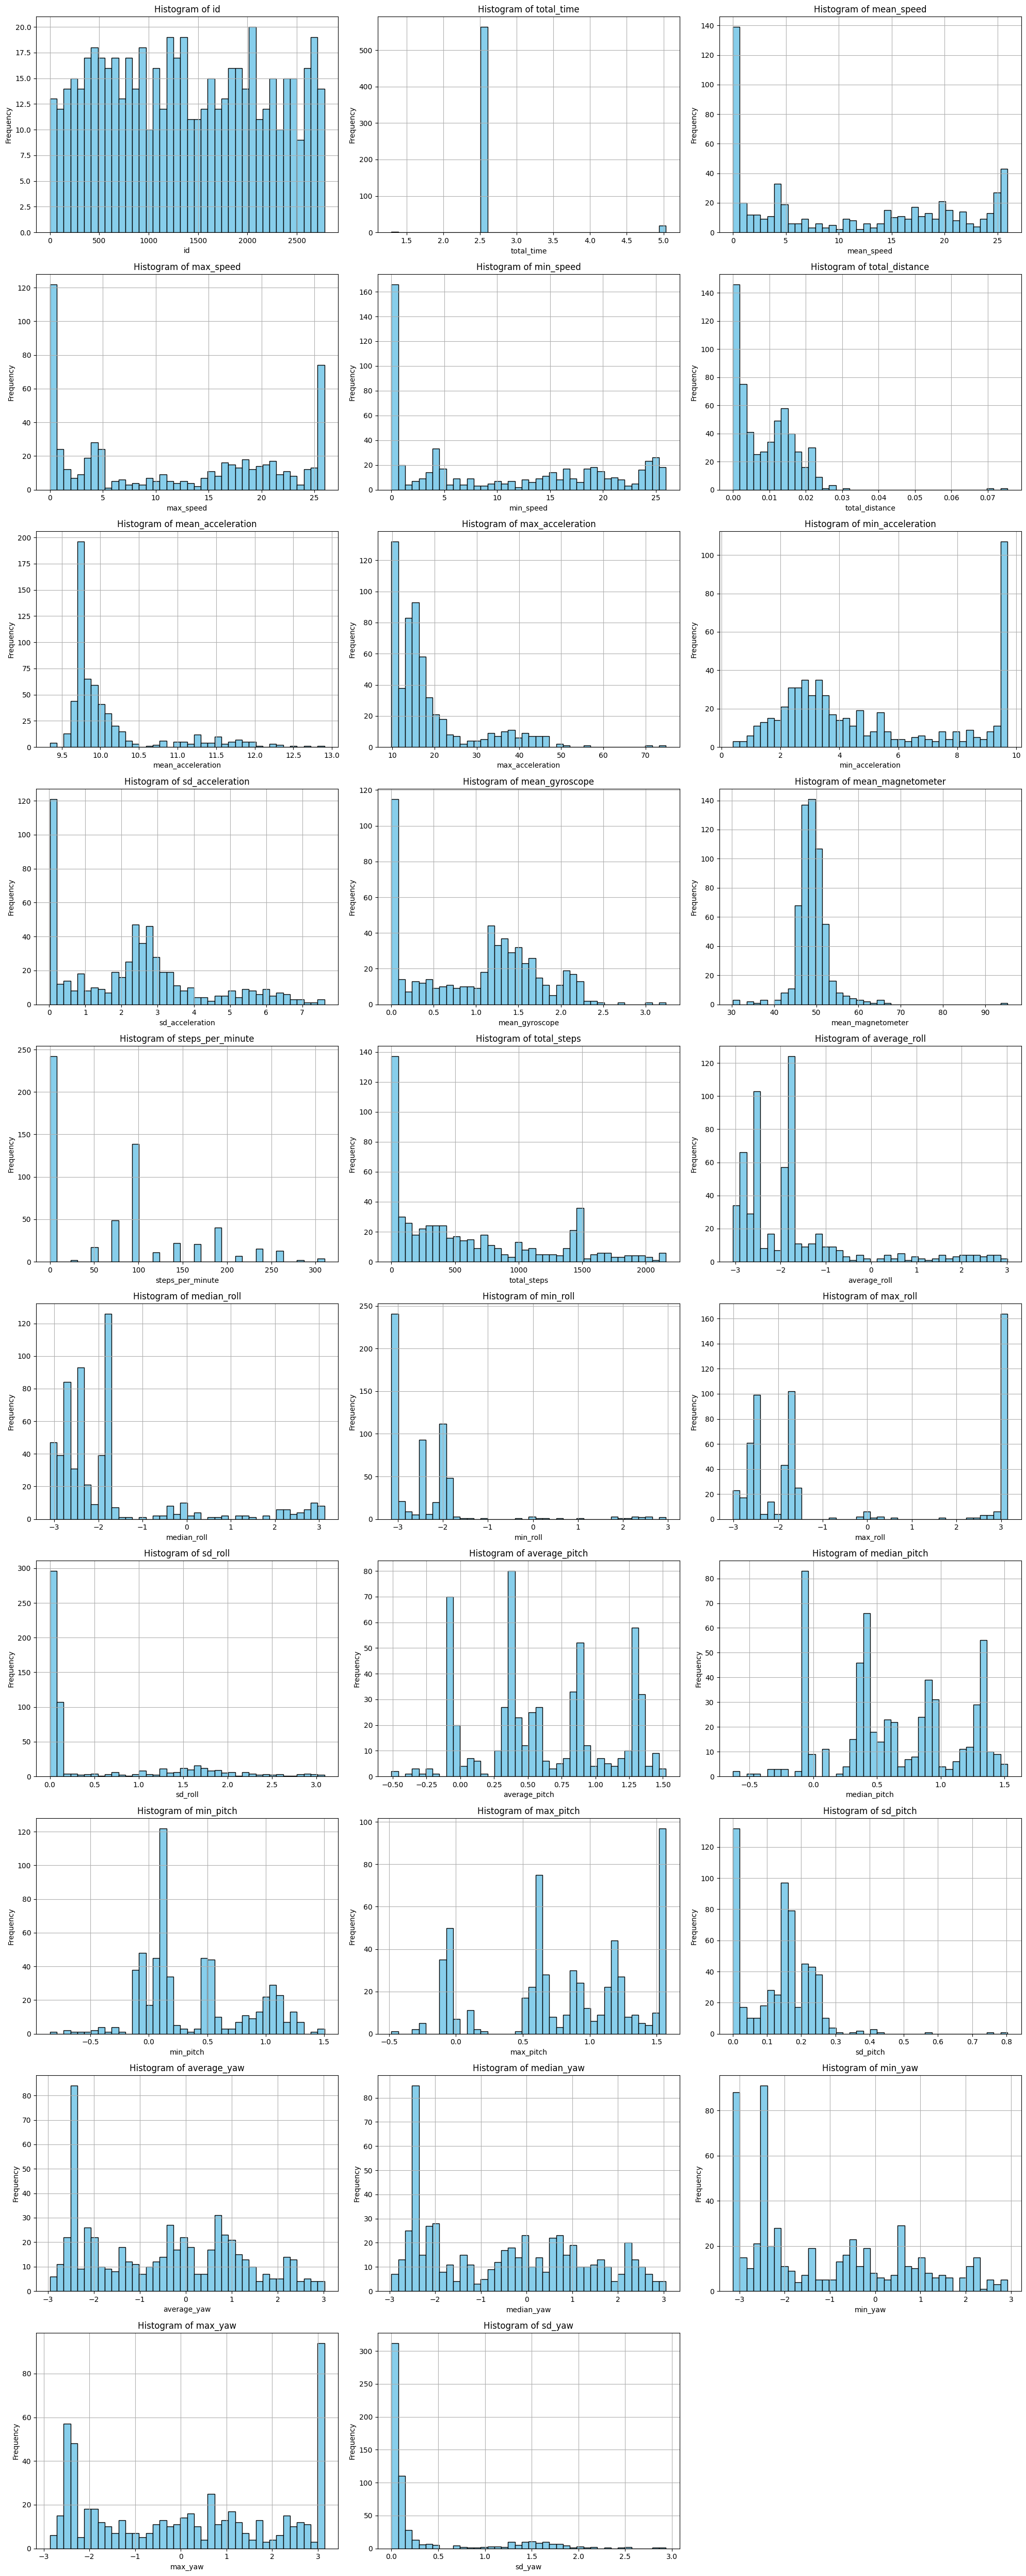

In [234]:
num_columns = len(result.columns)
num_rows = (num_columns + 2) // 3  

fig, axes = plt.subplots(num_rows, 3, figsize=(20, 5 * num_rows))
axes = axes.flatten()  

for i, column in enumerate(result.columns):
    axes[i].hist(result[column], bins=40, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

print()
print()


### Heatmap of correlation

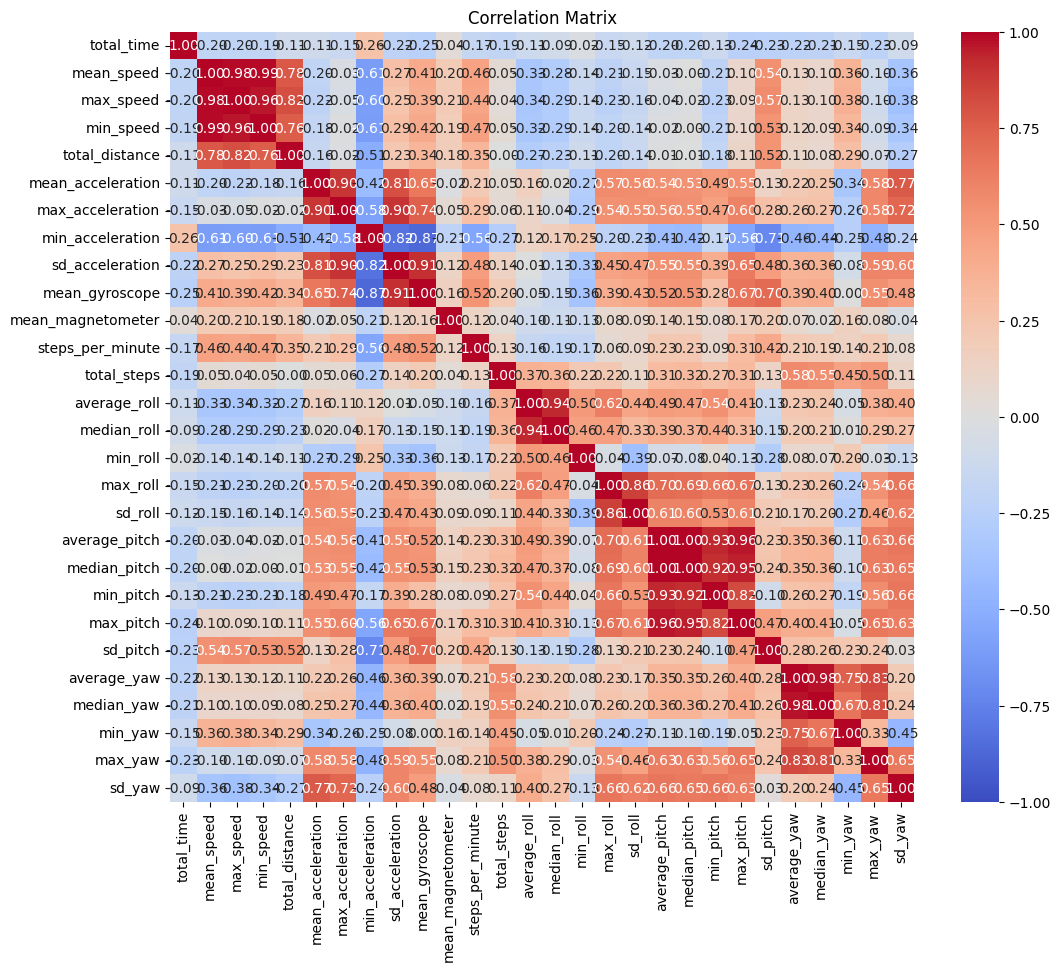

In [235]:
plt.figure(figsize=(12, 10))
sns.heatmap(result.loc[:,result.columns != 'id'].corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


### Dropping correlated columns

In [236]:
reduced_result = result.drop(columns=['sd_yaw', 'min_speed', 'total_steps', 'max_speed', 'min_pitch', 'total_distance', 'median_roll', 'max_yaw', 'median_yaw', 'average_yaw', 'sd_pitch', 'max_pitch', 'average_pitch', 'max_acceleration', 'min_acceleration', 'mean_gyroscope', 'max_roll', 'min_roll'])

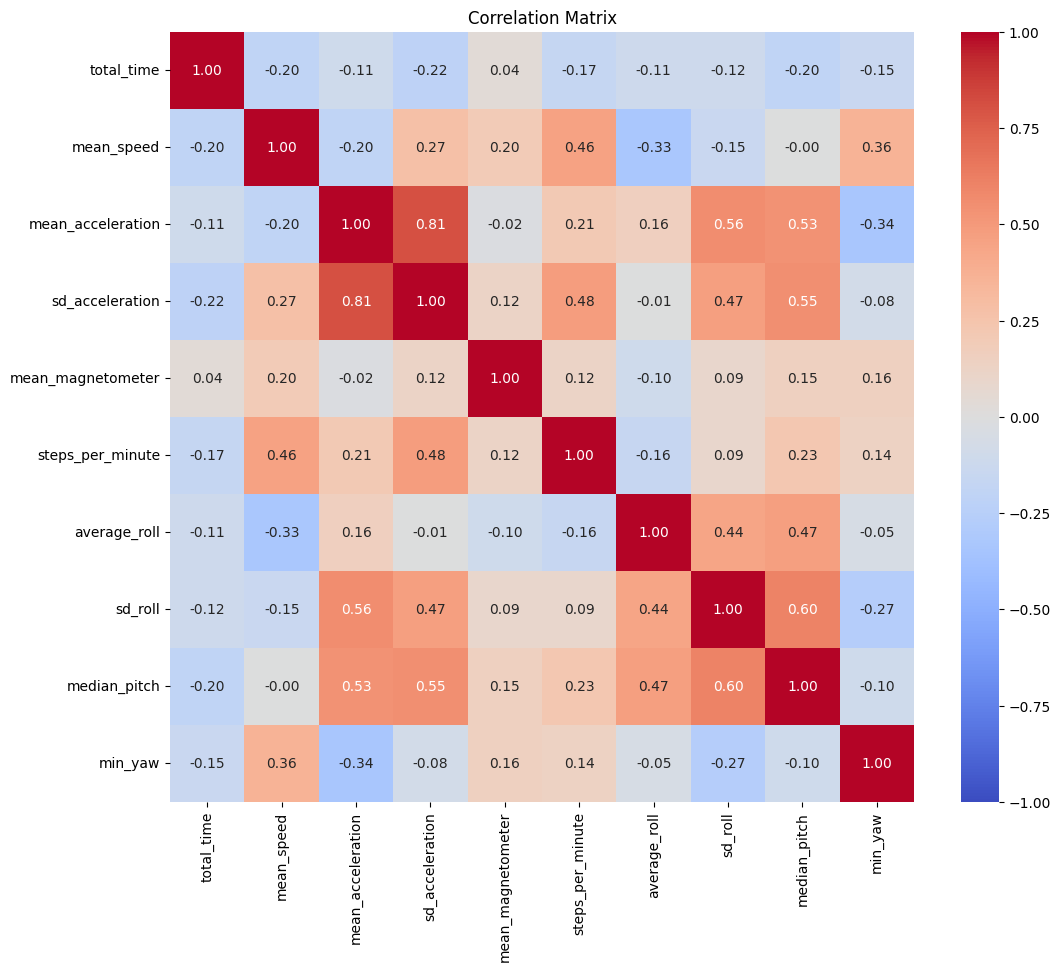

In [237]:
plt.figure(figsize=(12, 10))
sns.heatmap(reduced_result.loc[:, reduced_result.columns != 'id'].corr(), 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            center=0, 
            vmin=-1, 
            vmax=1)
plt.title('Correlation Matrix')
plt.show()

### Boxplots for every column

In [238]:
def plot_boxplots(df):
    num_cols = len(df.columns)
    
    num_rows = (num_cols + 2) // 3  # Round up to the nearest integer
    
    plt.figure(figsize=(15, 5 * num_rows))
    
    for i, col in enumerate(df.columns):
        plt.subplot(num_rows, 3, i + 1)
        plt.boxplot(df[col])
        plt.title(col)
    
    plt.tight_layout()
    plt.show()

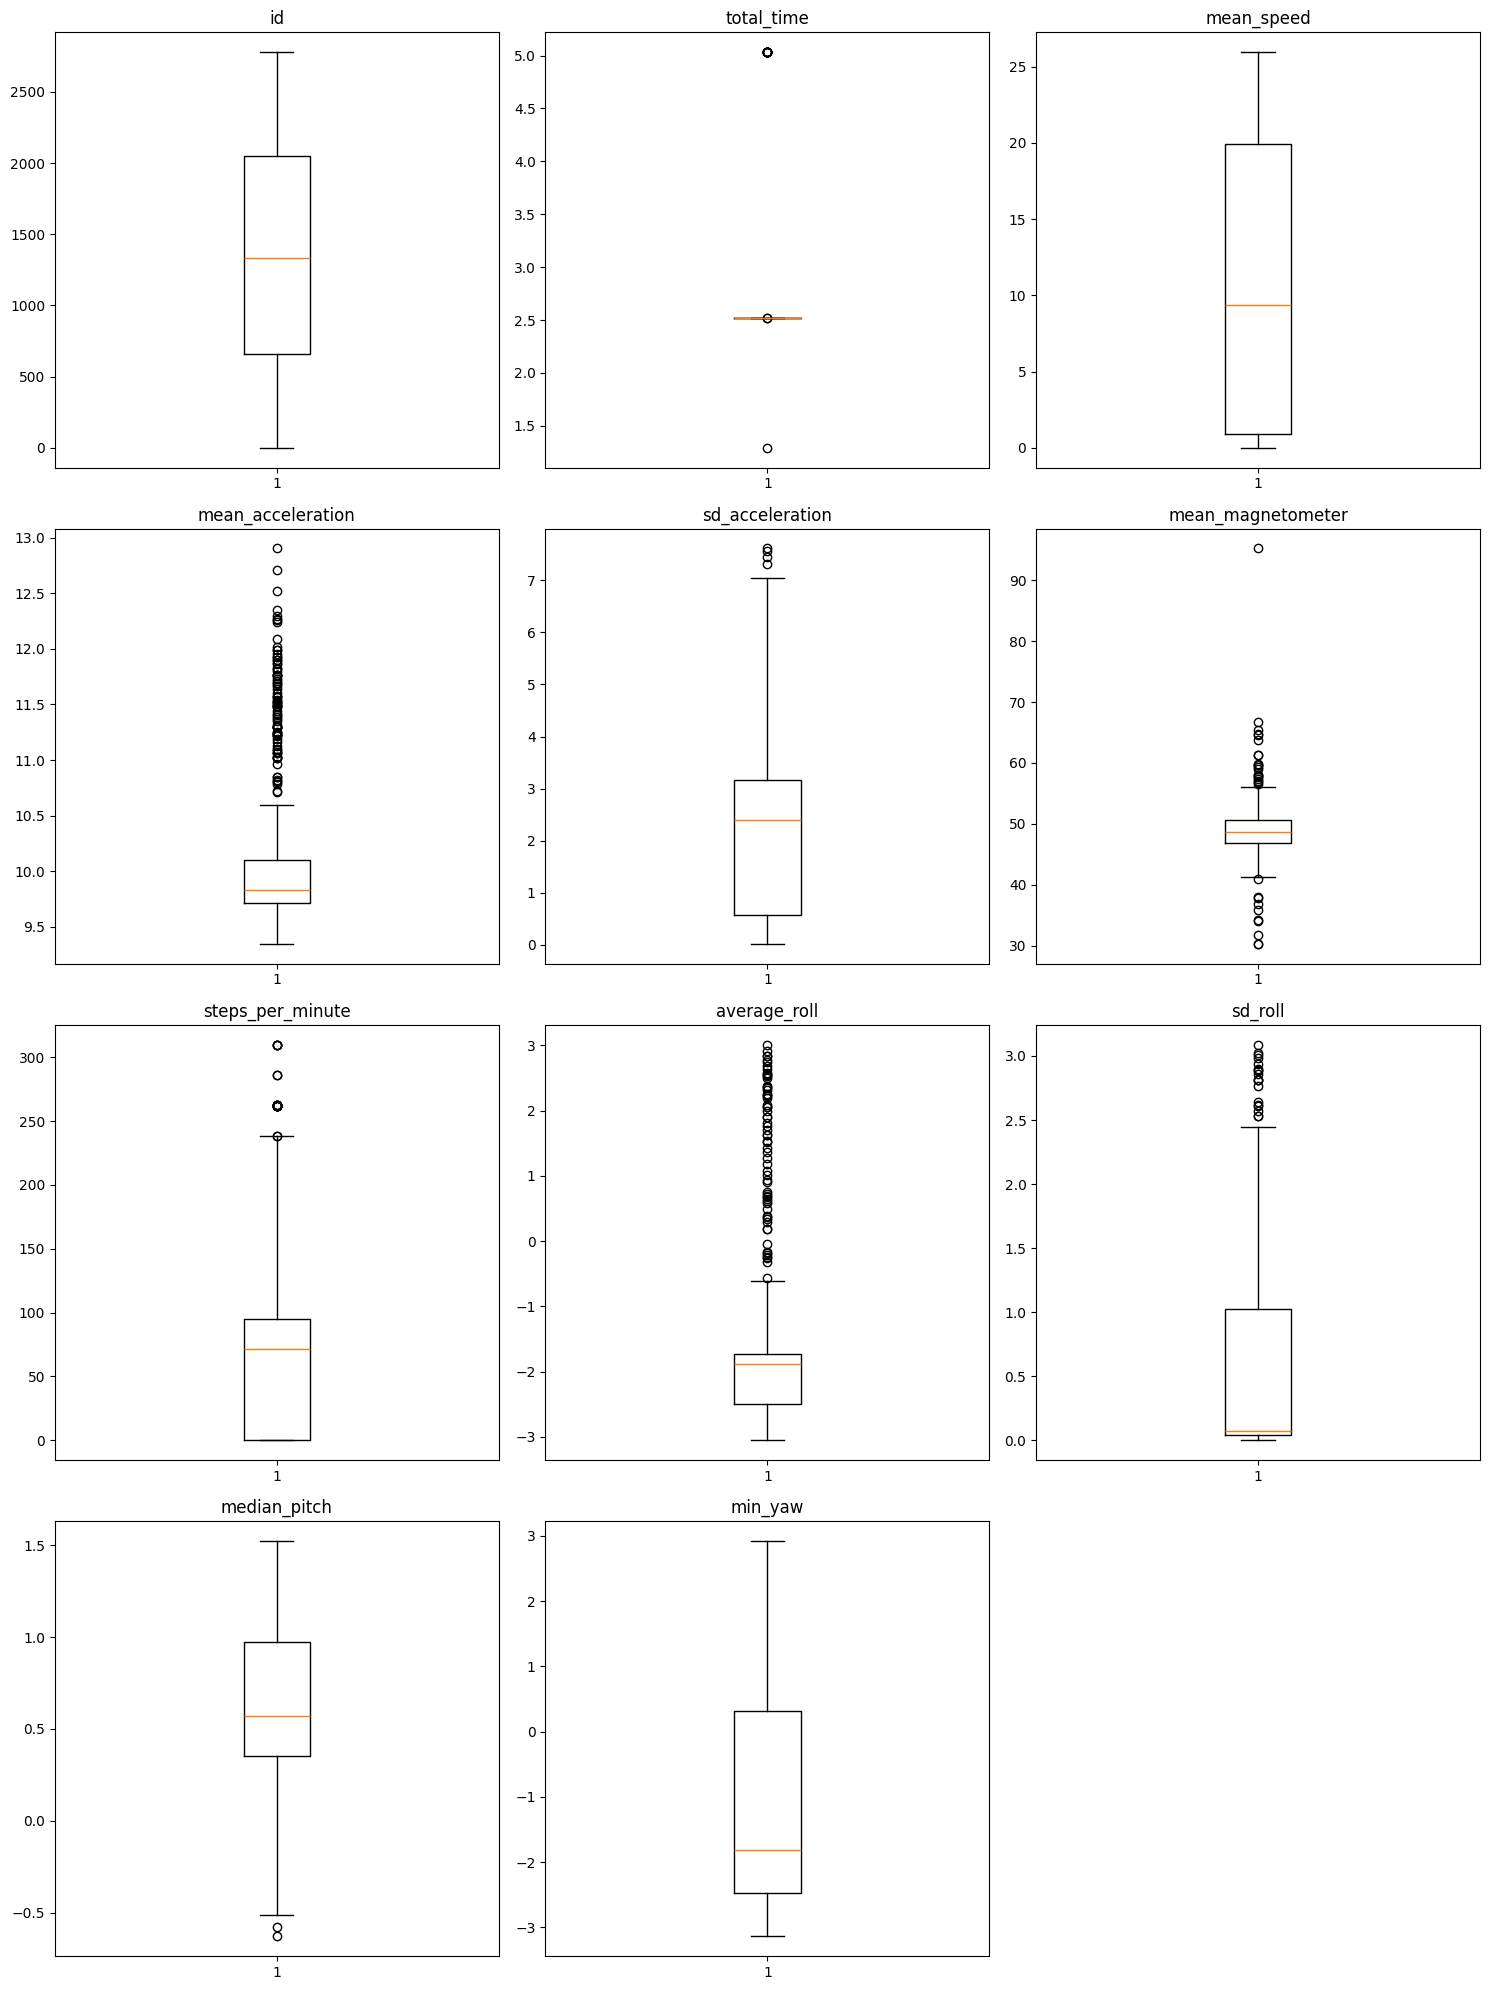

In [239]:
plot_boxplots(reduced_result)

We need to modify outliers in total_time and mean_magnetometer.

In [240]:
def replace_outliers_with_quantile(df):
    time_quantile = df['total_time'].quantile(0.95)
    magneto_quantile = df['mean_magnetometer'].quantile(0.95)
    
    df.loc[df['total_time'] > time_quantile, 'total_time'] = time_quantile
    
    df.loc[df['mean_magnetometer'] > magneto_quantile, 'mean_magnetometer'] = magneto_quantile
    
    return df

In [241]:
replace_outliers_with_quantile(reduced_result)

id  total_time    mean_speed  mean_acceleration  sd_acceleration  \
0       0.0    2.516545  1.945753e+00          11.015459         3.992875   
1       3.0    2.516626  8.628256e+00           9.768076         2.349455   
2       4.0    2.516632  1.808818e+01           9.887447         2.411183   
3      17.0    2.516457  2.129541e+01           9.396715         2.690116   
4      19.0    2.516456  2.030204e+01           9.748704         2.321185   
..      ...         ...           ...                ...              ...   
579  2771.0    2.516877  1.027178e-21           9.715216         0.057502   
580  2775.0    2.516877  6.613088e-34           9.711081         0.083760   
581  2777.0    2.516877  8.063703e-40           9.713457         0.043896   
582  2778.0    2.516874  9.794135e-43           9.747030         0.482260   
583  2779.0    2.516870  0.000000e+00          10.711774         3.508324   

     mean_magnetometer  steps_per_minute  average_roll   sd_roll  \
0            44.985078        238.422122     -0.644303  0.701319   
1            54.416209          0.000000     -2.708276  0.140021   
2            54.416209         47.682776     -2.761200  0.115934   
3            54.416209         95.372184     -2.740100  0.124651   
4            54.416209         95.372222     -2.707742  0.117270   
..                 ...               ...           ...       ...   
579          47.155027          0.000000     -2.781184  0.010093   
580          47.041843          0.000000     -2.788460  0.008825   
581          46.980630          0.000000     -2.694629  0.003280   
582          47.180419          0.000000     -2.711286  0.013943   
583          46.741448          0.000000     -1.843178  1.071552   

     median_pitch   min_yaw  
0       -0.577149 -2.518292  
1        0.831813  0.573503  
2        0.909612  0.730423  
3        0.822419  1.415597  
4        0.865987  1.335072  
..            ...       ...  
579     -0.281333  2.757857  
580     -0.256091  2.785836  
581     -0.250087  2.725769  
582     -0.245037  2.577463  
583     -0.259558 -0.163194  

[584 rows x 11 columns]

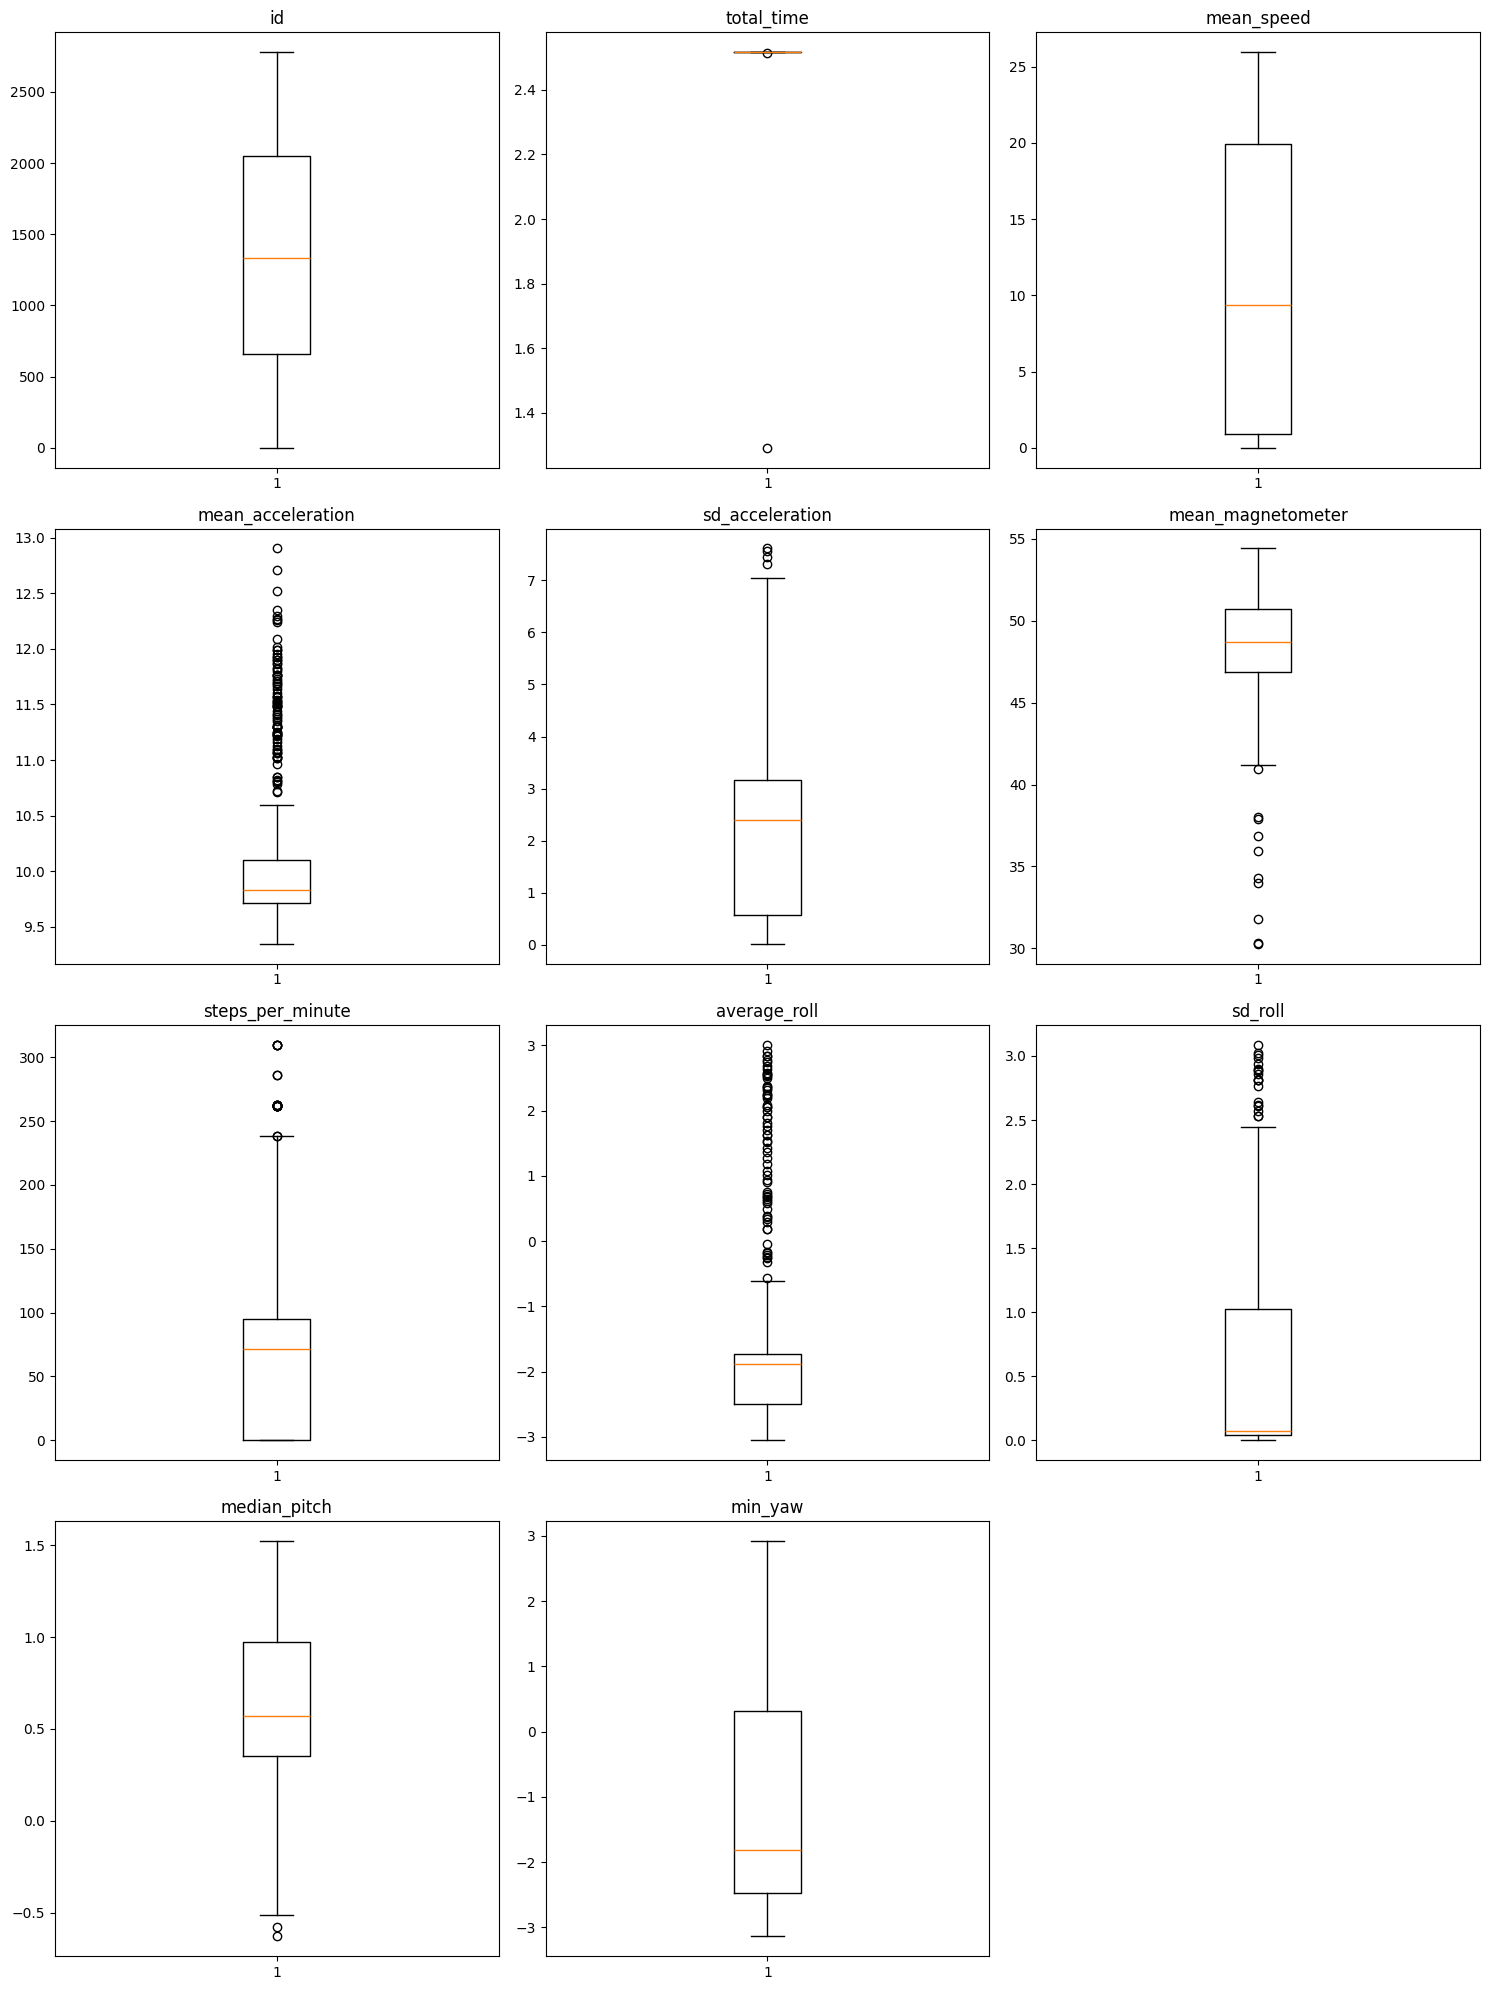

In [242]:
plot_boxplots(reduced_result)

We don't want to analyze activities shorter than 1 second, so we will remove them from the dataset.

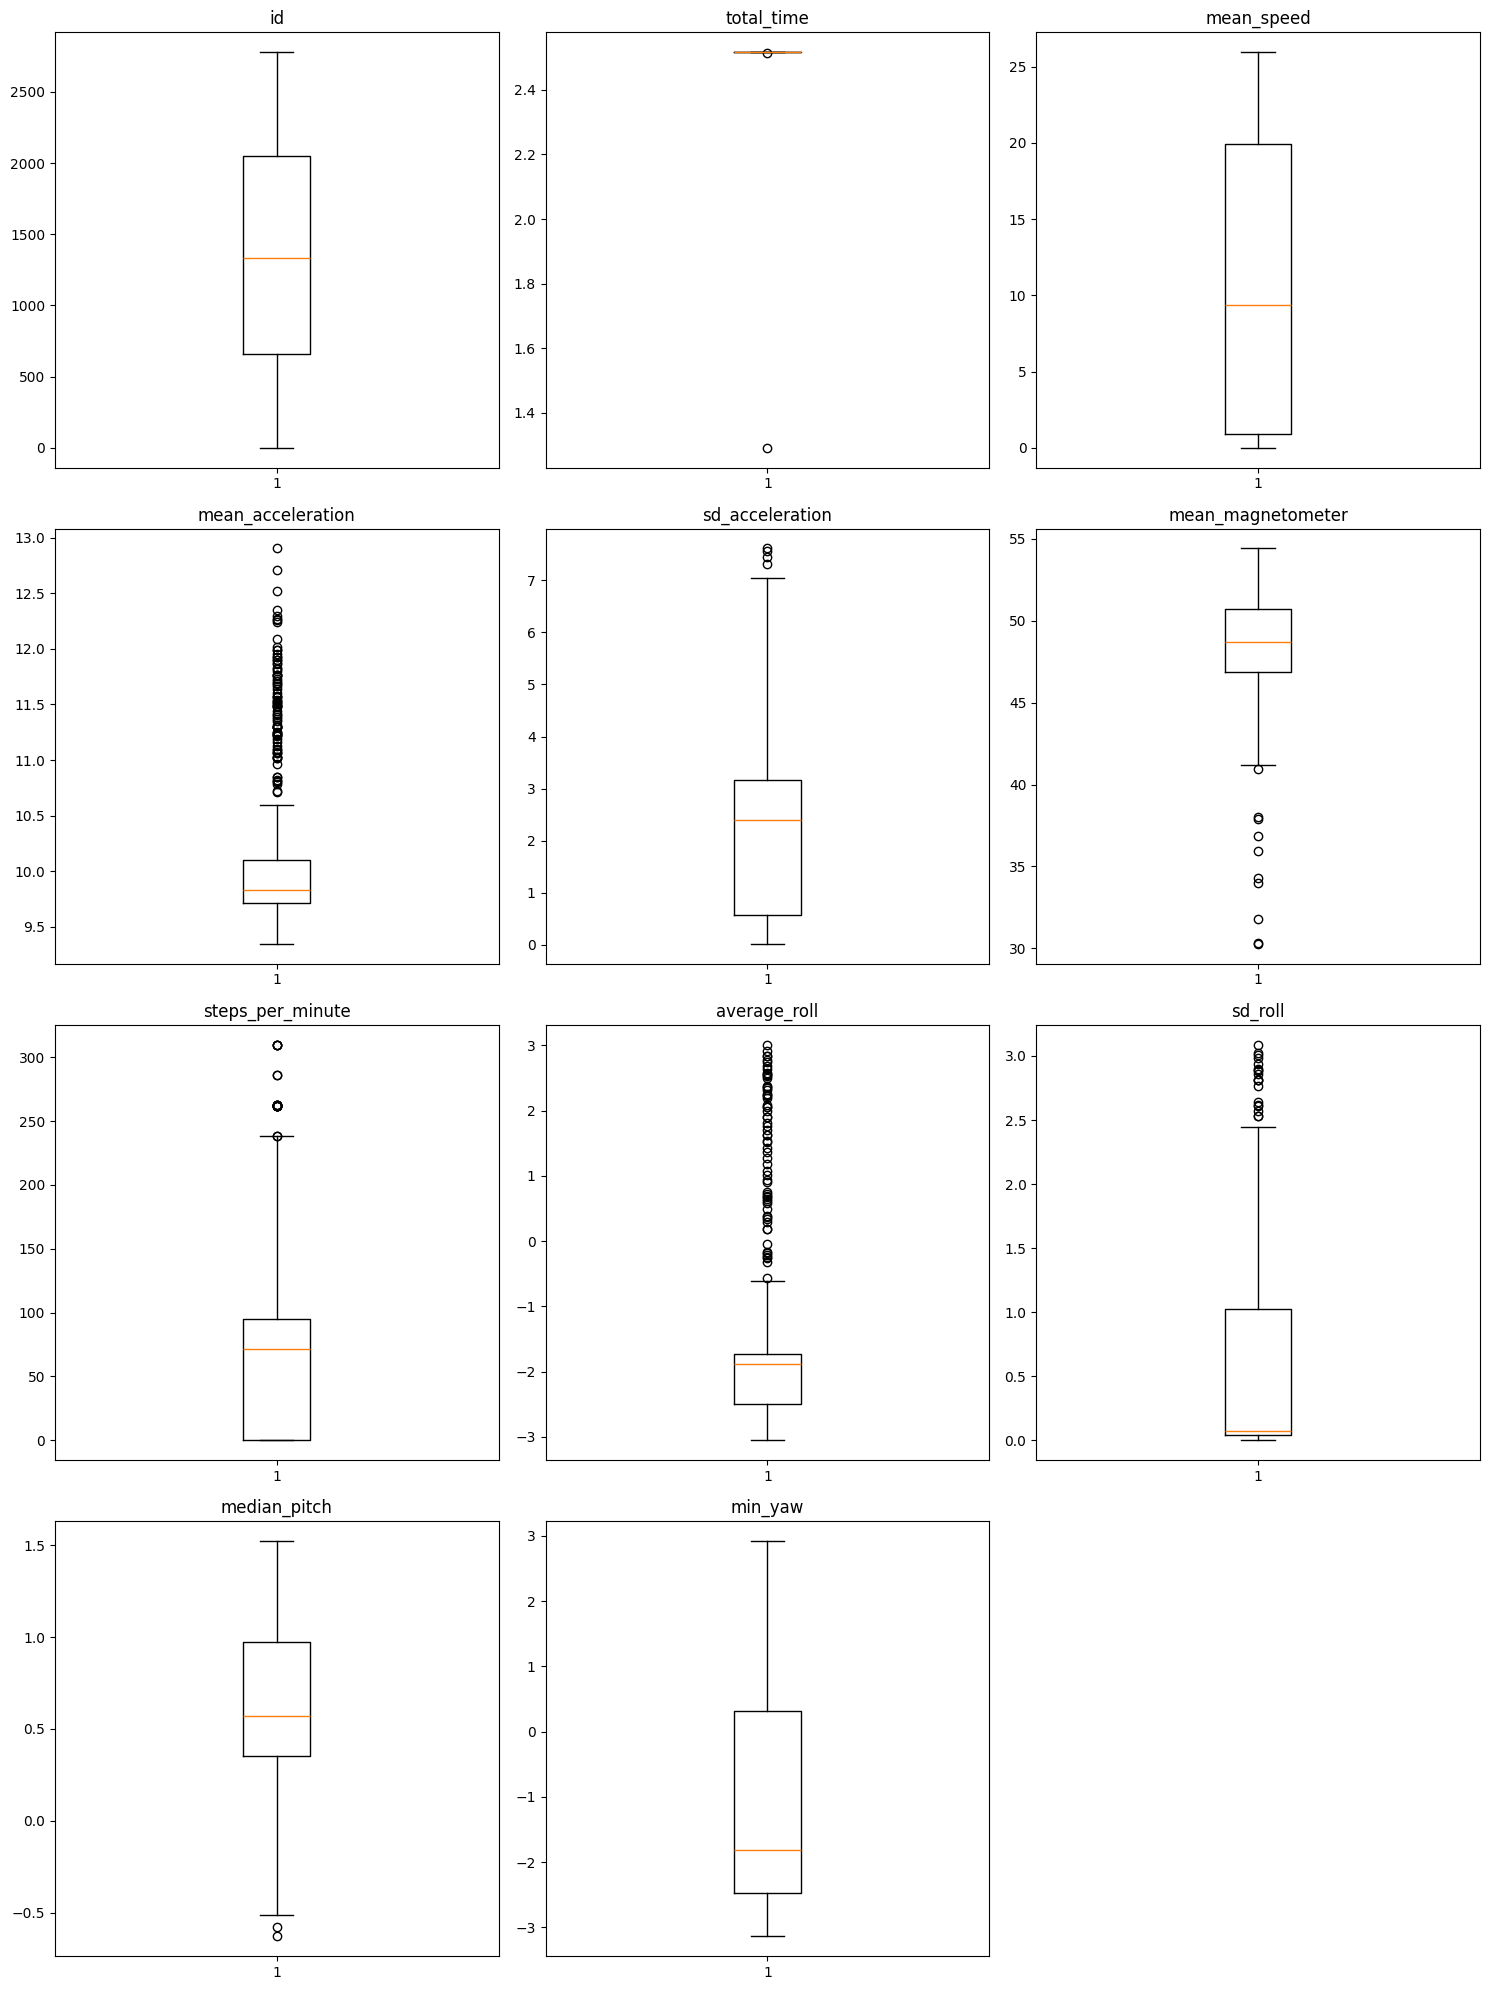

In [243]:
time_min = 1
Y_train.drop(reduced_result[reduced_result['total_time'] < time_min].index, inplace=True)
reduced_result.drop(reduced_result[reduced_result['total_time'] < time_min].index, inplace=True)

plot_boxplots(reduced_result)


## **Models**

Real labels from dataset.

In [244]:
real_labels = Y_train['act_type']


We can now drop id from our data frame.

In [245]:
reduced_result.drop(columns=['id'], inplace=True)

### Elbow method

Number of clusters: 2, Inertia: 1212053.0121989828
Number of clusters: 3, Inertia: 320766.26654608897
Number of clusters: 4, Inertia: 168306.02834646316
Number of clusters: 5, Inertia: 121159.58239744738
Number of clusters: 6, Inertia: 84364.50458952422
Number of clusters: 7, Inertia: 70457.23191963256
Number of clusters: 8, Inertia: 60231.427761997285
Number of clusters: 9, Inertia: 53503.257948594575
Number of clusters: 10, Inertia: 43519.91046984759


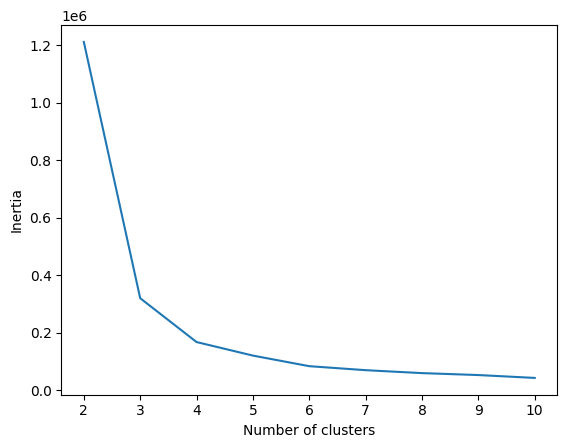

In [246]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertias = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(reduced_result)
    labels = kmeans.predict(reduced_result)
    print(f'Number of clusters: {i}, Inertia: {kmeans.inertia_}')
    inertias.append(kmeans.inertia_)
    
plt.plot(range(2, 11), inertias)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


### Silhouette score

In [247]:
def count_clustering_scores(X, cluster_num, model, score_fun):
    if isinstance(cluster_num, int):
        cluster_num_iter = [cluster_num]
    else:
        cluster_num_iter = cluster_num
        
    scores = []    
    for k in cluster_num_iter:
        model_instance = model(n_clusters=k,random_state=42)
        labels = model_instance.fit_predict(X)
        wcss = score_fun(X, labels)
        scores.append(wcss)
    
    if isinstance(cluster_num, int):
        return scores[0]
    else:
        return scores

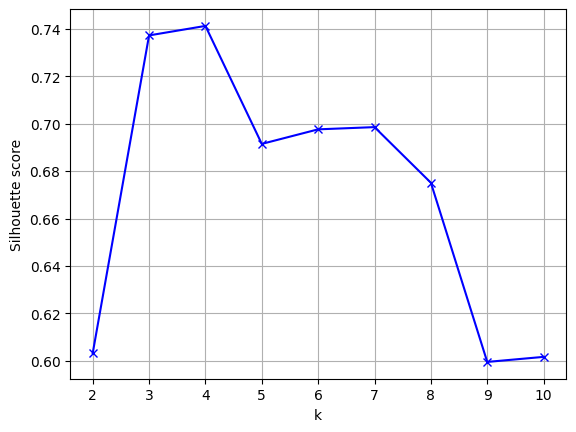

In [248]:
cluster_num_seq = range(2, 11)
silhouette_vec = count_clustering_scores(reduced_result, cluster_num_seq, KMeans, silhouette_score)
plt.plot(cluster_num_seq, silhouette_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.xticks(cluster_num_seq)
plt.grid(True)
plt.show()

### Davies-Bouldin score

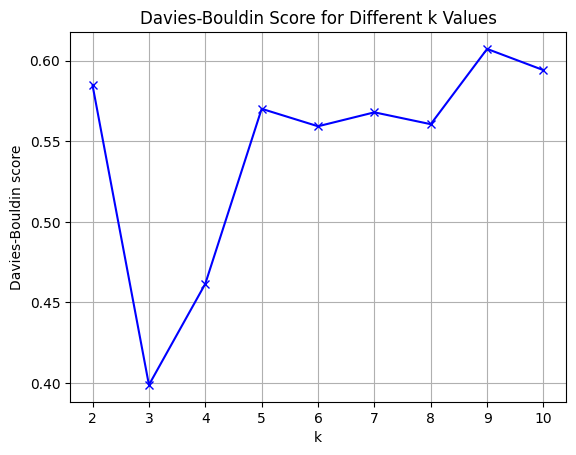

In [249]:
cluster_num_seq = range(2, 11)
#davies_bouldin_vec = count_clustering_scores(df, cluster_num_seq, KMeans, davies_bouldin_score)

davies_bouldin_vec = []
for k in cluster_num_seq:
    kmeans = KMeans(n_clusters=k,random_state=42)
    davies_bouldin_vec.append(davies_bouldin_score(reduced_result, kmeans.fit_predict(reduced_result)))


plt.plot(cluster_num_seq, davies_bouldin_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin Score for Different k Values')
plt.xticks(cluster_num_seq)
plt.grid(True)
plt.show()

### Caliński-Harabasz score

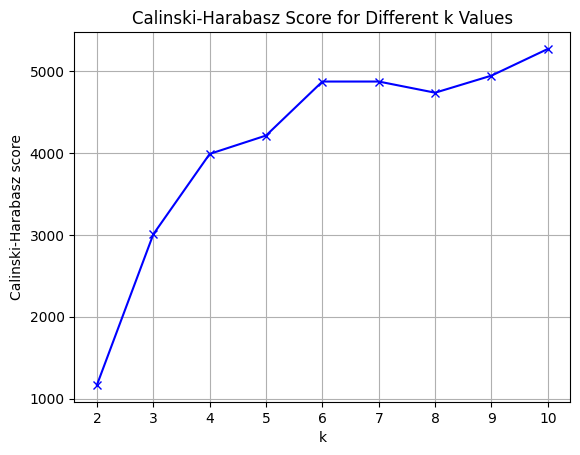

In [250]:
cluster_num_seq = range(2, 11)

calinski_harabasz_vec = count_clustering_scores(reduced_result, cluster_num_seq, KMeans, calinski_harabasz_score)

plt.plot(cluster_num_seq, calinski_harabasz_vec, 'bx-')
plt.xlabel('k')
plt.ylabel('Calinski-Harabasz score')
plt.title('Calinski-Harabasz Score for Different k Values')
plt.xticks(cluster_num_seq)
plt.grid(True)
plt.show()

We set n_clusters = 3

In [251]:
n_clusters = 3

In [252]:
real_color_labels = ['yellow' if real_labels.iloc[i] == 0 else 'blue' if real_labels.iloc[i] == 1 else 'green' for i in range(len(real_labels))]
real_color_labels

['yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',
 'yellow',

### Function to do KMeans clustering

In [253]:
from sklearn import metrics
def doKmeans(X, nclust=n_clusters, xaxis = 2, yaxis = 6, real = False,  multidimensional = False, zaxis = 4):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X).flatten()
    centers = model.cluster_centers_
    
    color_labels = ['yellow' if clust_labels[i] == 0 else 'blue' if clust_labels[i] == 1 else 'green' for i in range(len(clust_labels))]
    
    print(f"Model inertia: {model.inertia_}")
    print("Accuracy: ", np.mean(real_labels == clust_labels))
    print("Silhouette coefficient:" , silhouette_score(X, clust_labels))
    print("Davies Bouldin Score:" , davies_bouldin_score(X, clust_labels))
    print("Calinski Harabasz Score:" , calinski_harabasz_score(X, clust_labels))
    print()
    
    
    
    # i = 0
    # for label in real_labels:
    #     if label == 0:
    #         plt.scatter(X.iloc[i, 0], X.iloc[i, 1], marker='o', c=color_labels[i], s=50)
    #     elif label == 1:
    #         plt.scatter(X.iloc[i, 0], X.iloc[i, 1], marker='s', c=color_labels[i], s=50)
    #     elif label == 2:
    #         plt.scatter(X.iloc[i, 0], X.iloc[i, 1], marker='^', c=color_labels[i], s=50)
    #     i += 1
    
        
    plt.scatter(X.iloc[:, xaxis], X.iloc[:, yaxis], marker='o', c=color_labels, s=50, cmap='viridis')

    plt.scatter(centers[:, xaxis], centers[:, yaxis], c='red', s=200, alpha=0.75, marker='X')

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('K-means Clustering with Centroids')
    plt.show()
    
    if real:
        plt.scatter(X.iloc[:, xaxis], X.iloc[:, yaxis], marker='o', c=real_color_labels, s=50, cmap='viridis')

        plt.scatter(centers[:, xaxis], centers[:, yaxis], c='red', s=200, alpha=0.75, marker='X')

        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('K-means Clustering with Centroids')
        plt.show()
        
    if multidimensional:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Scatter plot for data points
        ax.scatter(X.iloc[:, xaxis], X.iloc[:, yaxis], X.iloc[:, zaxis], c=color_labels, s=50, cmap='viridis')

        # Scatter plot for centroids
        ax.scatter(centers[:, xaxis], centers[:, yaxis], centers[:, zaxis], c='red', s=200, alpha=0.75, marker='X')

        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_zlabel('Feature 3')
        ax.set_title('K-means Clustering with Centroids')

        plt.show()
        
    if multidimensional & real:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        # Scatter plot for data points
        ax.scatter(X.iloc[:, xaxis], X.iloc[:, yaxis], X.iloc[:, zaxis], c=real_color_labels, s=50, cmap='viridis')

        # Scatter plot for centroids
        ax.scatter(centers[:, xaxis], centers[:, yaxis], centers[:, zaxis], c='red', s=200, alpha=0.75, marker='X')

        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_zlabel('Feature 3')
        ax.set_title('K-means Clustering with Centroids')

        plt.show()

    return clust_labels

### Tests

Basic

Model inertia: 320766.26654608897
Accuracy:  0.511986301369863
Silhouette coefficient: 0.7372695046277006
Davies Bouldin Score: 0.3987388973130519
Calinski Harabasz Score: 3006.9911533213685



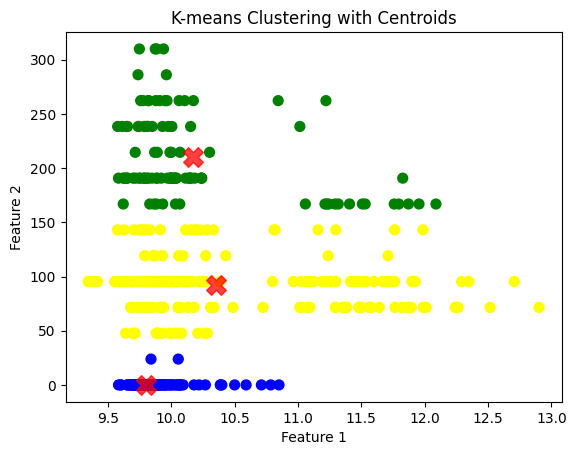

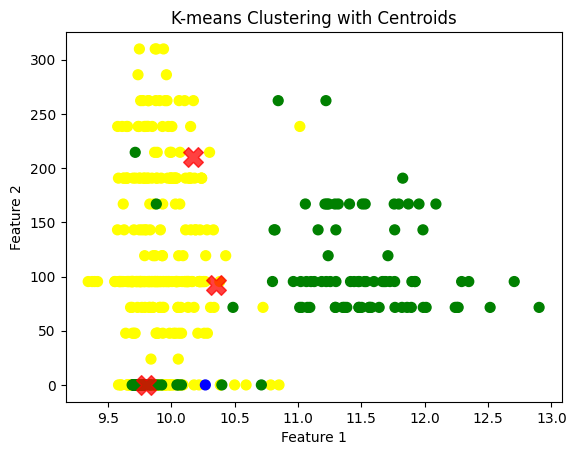

In [254]:
x = reduced_result.copy()
clust_labels = doKmeans(x, n_clusters, 2, 5, True)


Standarization

Model inertia: 3430.5661003593814
Accuracy:  0.5633561643835616
Silhouette coefficient: 0.3489235724248813
Davies Bouldin Score: 1.2592097666730038
Calinski Harabasz Score: 204.03062566620557



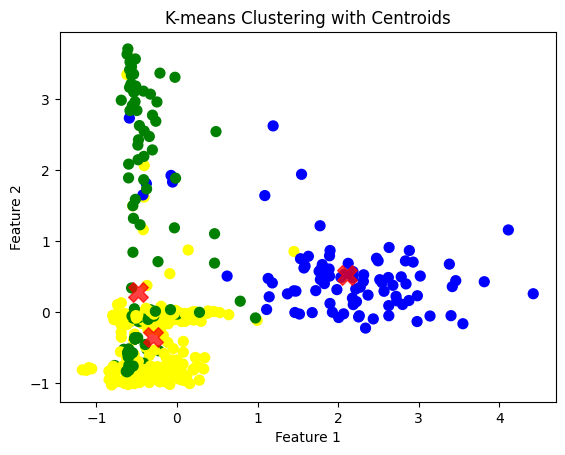

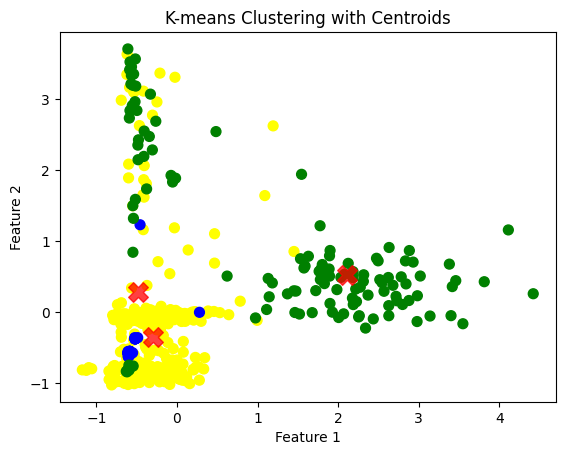

In [255]:
x = reduced_result.copy()
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x, columns=reduced_result.columns)
clust_labels = doKmeans(x, n_clusters, 2, 6, True)


Normalization

Model inertia: 9.94453279144061
Accuracy:  0.4982876712328767
Silhouette coefficient: 0.6561454638832761
Davies Bouldin Score: 0.52291042824618
Calinski Harabasz Score: 4791.172611461786



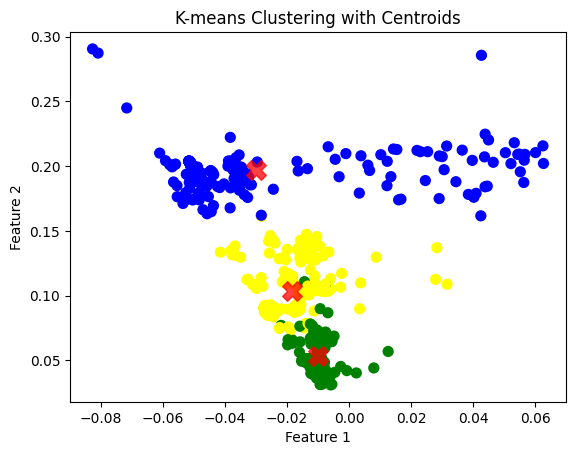

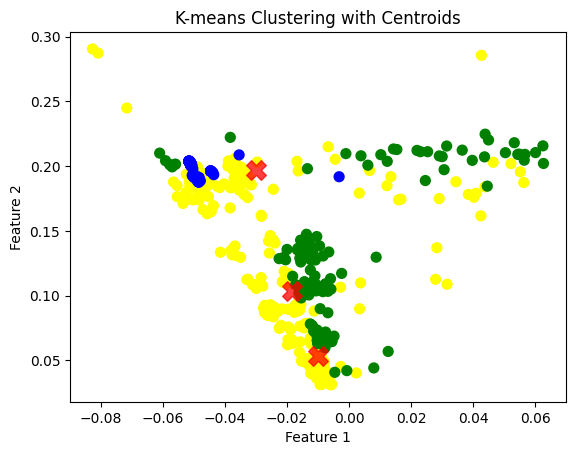

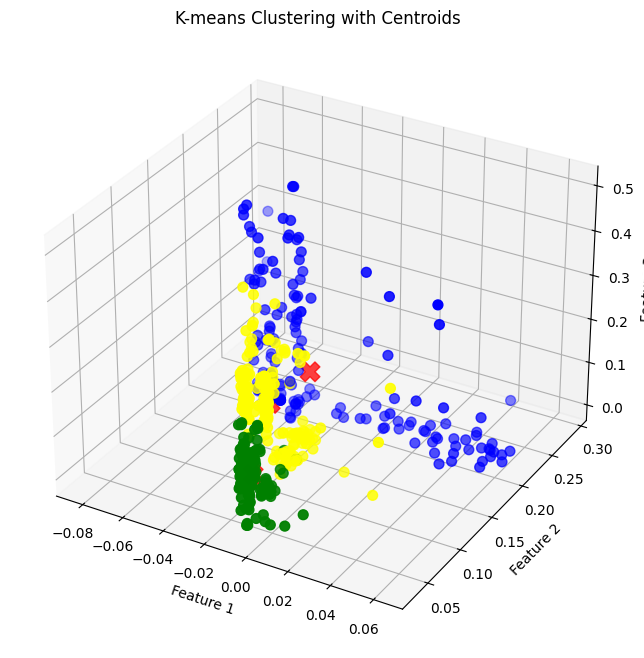

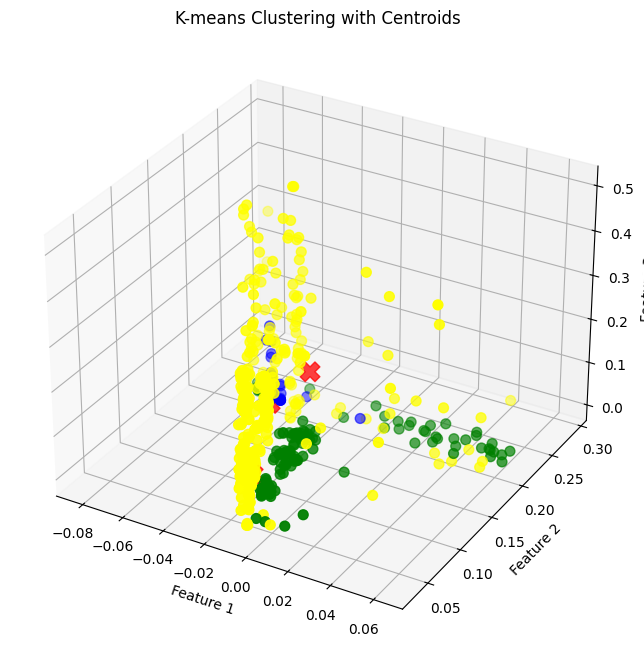

In [256]:
x = reduced_result.copy()
normalizer = Normalizer()
x = normalizer.fit_transform(x)
x = pd.DataFrame(x, columns=reduced_result.columns)
clust_labels_norm = doKmeans(x, n_clusters, 6, 2, True, True, 1)

Normalization + standarization

Model inertia: 308.4917117654764
Accuracy:  0.8304794520547946
Silhouette coefficient: 0.35640897465873944
Davies Bouldin Score: 1.2392862777579723
Calinski Harabasz Score: 250.10646582084865



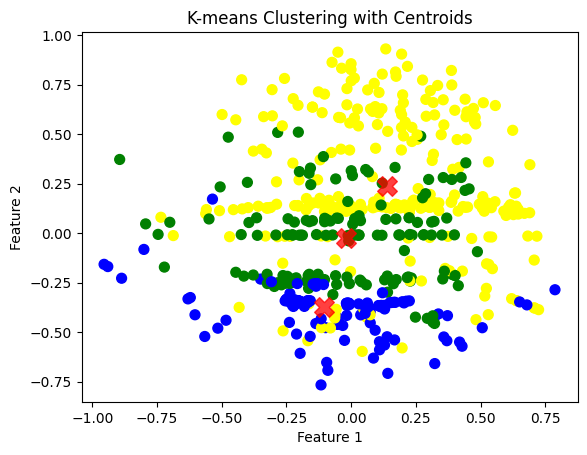

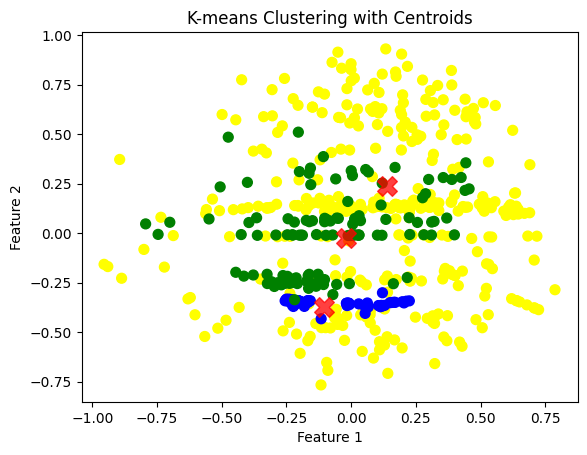

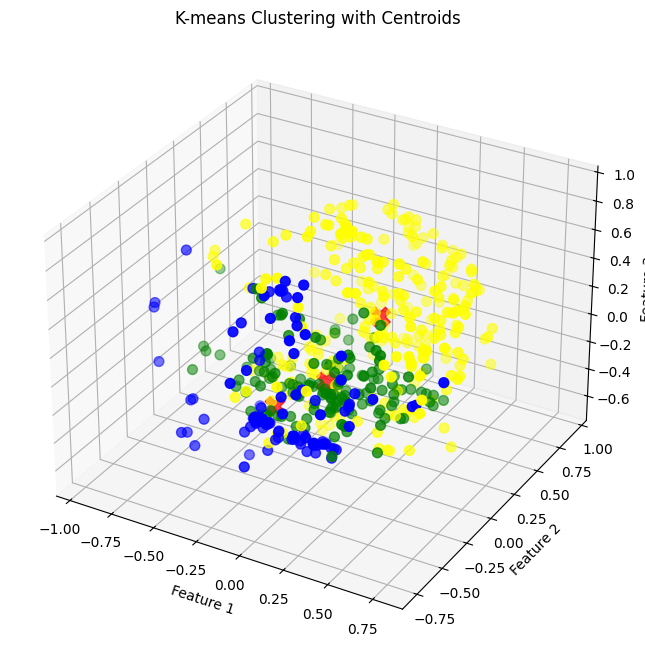

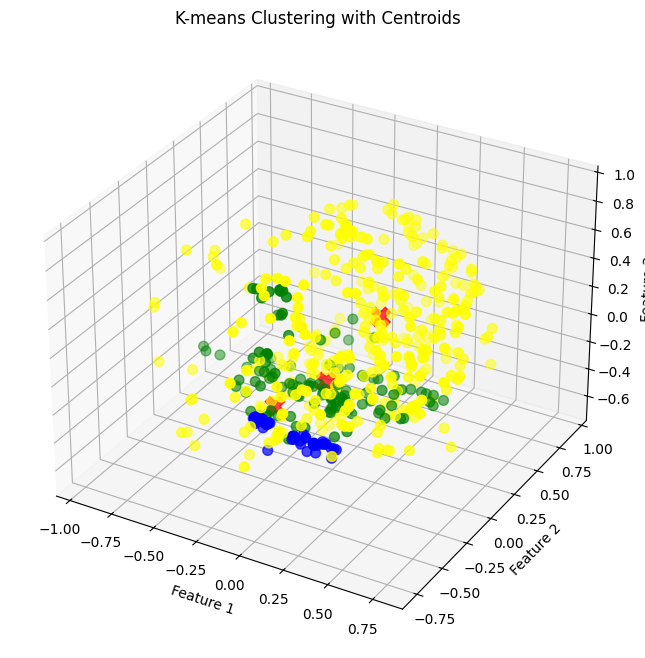

In [257]:
x = reduced_result.copy()
normalizer = Normalizer()
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = normalizer.fit_transform(x)
x = pd.DataFrame(x, columns=reduced_result.columns)
clust_labels = doKmeans(x, n_clusters, 4, 5, True, True, 9)

PowerTransformer

Model inertia: 2886.5835872206476
Accuracy:  0.8767123287671232
Silhouette coefficient: 0.3817032139322264
Davies Bouldin Score: 1.1659276342552014
Calinski Harabasz Score: 238.45332972850017



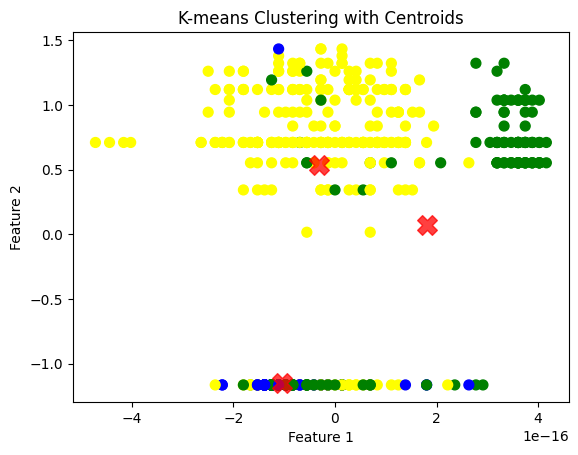

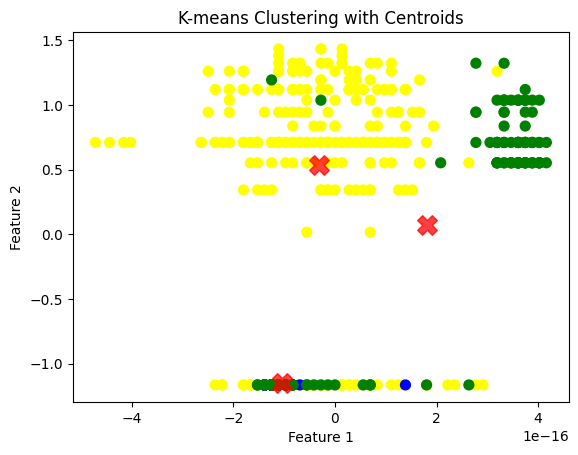

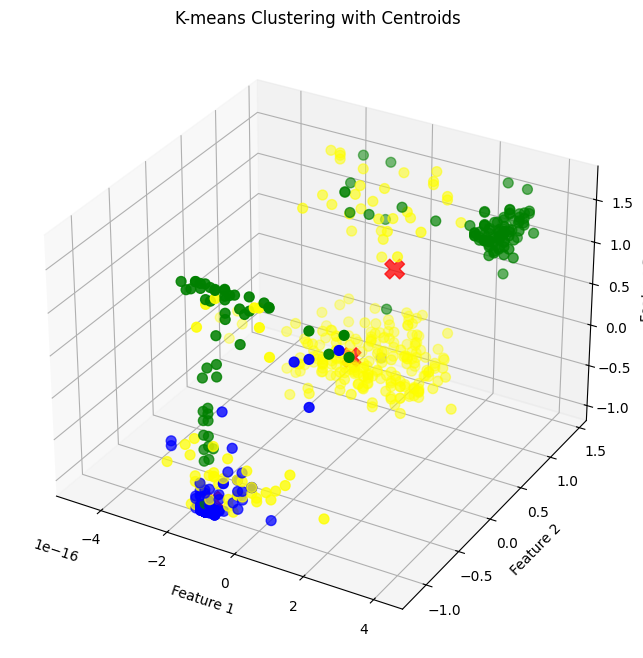

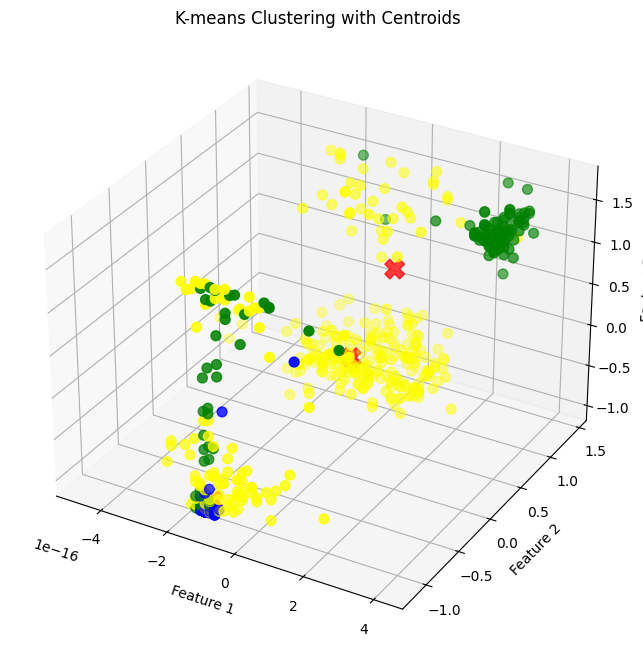

In [258]:
x = reduced_result.copy()
powerTransformer = PowerTransformer()
x = powerTransformer.fit_transform(x)
x = pd.DataFrame(x, columns=reduced_result.columns)
clust_labels = doKmeans(x, n_clusters, 2, 5, True, True, 7)

### PCA

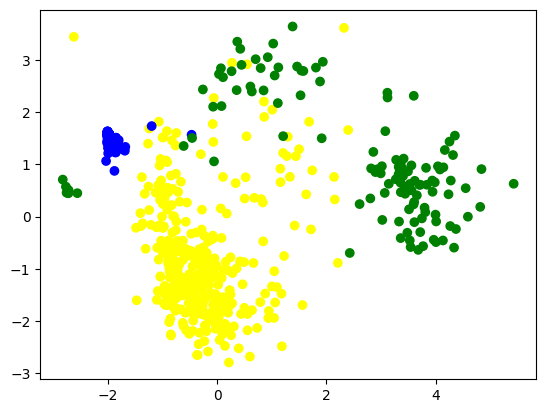

Model inertia: 260.68864292313964
Accuracy:  0.8236301369863014
Silhouette coefficient: 0.6030450336465691
Davies Bouldin Score: 0.538597023274376
Calinski Harabasz Score: 1011.0680169083504



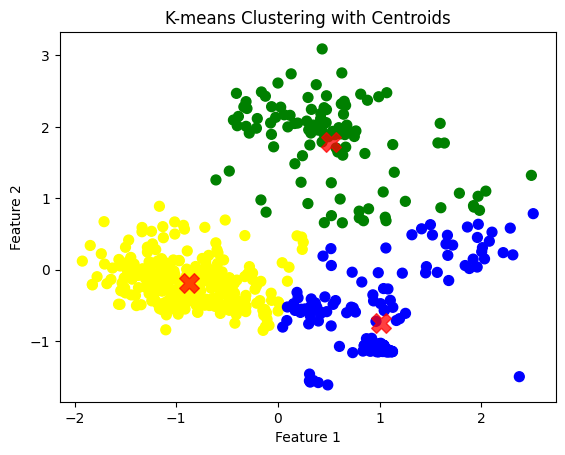

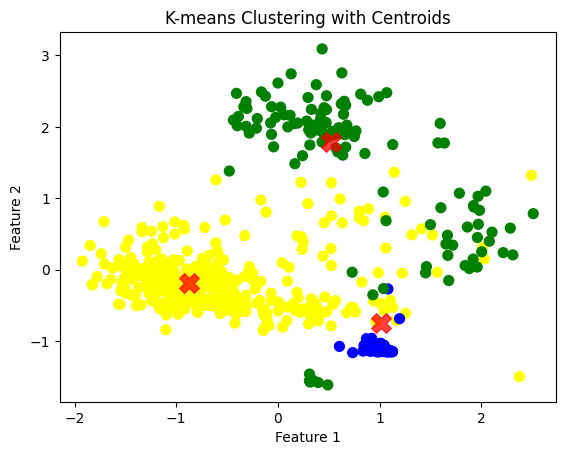

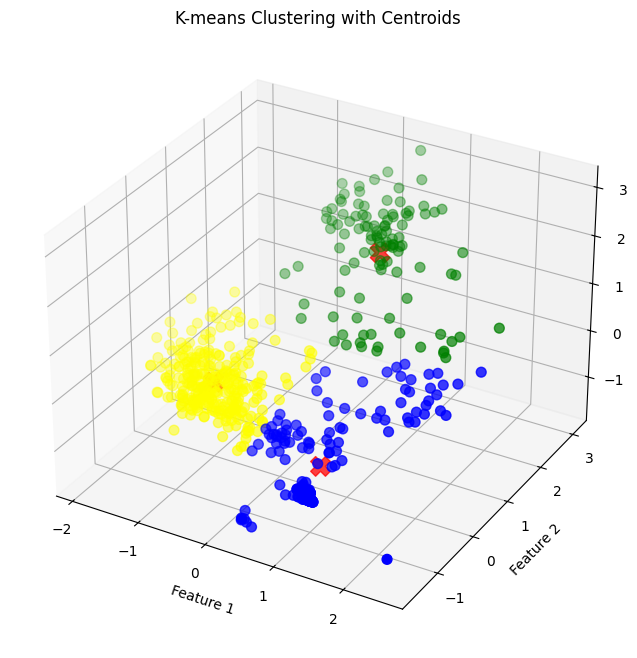

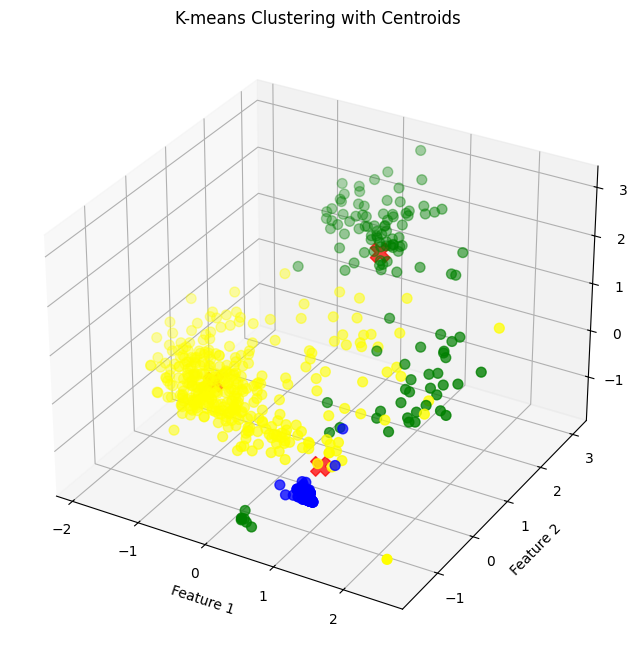

In [259]:
scaler = StandardScaler()
x = reduced_result.copy()
x = scaler.fit_transform(x)

model = PCA(n_components=2)
transformed = model.fit_transform(x)
xs = transformed[:,0]
ys = transformed[:,1]
x = pd.DataFrame(transformed)
scaler2 = StandardScaler()
x = scaler2.fit_transform(x)
x = pd.DataFrame(x)
plt.scatter(xs,ys,c=real_color_labels)  
plt.show()
clust_labels = doKmeans(x, n_clusters, 1, 0, True, True, 0)

### Explained variance for PCA

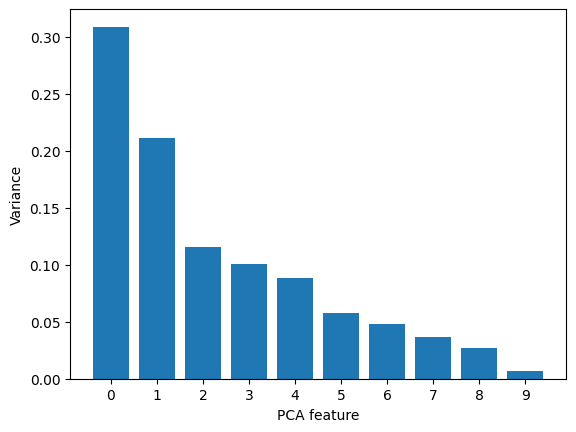

In [260]:
x = reduced_result.copy()
scaler = StandardScaler()

x = scaler.fit_transform(x)
model = PCA()
model.fit(x)

features = range(model.n_components_)
plt.bar(features, model.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.xticks(features)
plt.show()


### TSNE

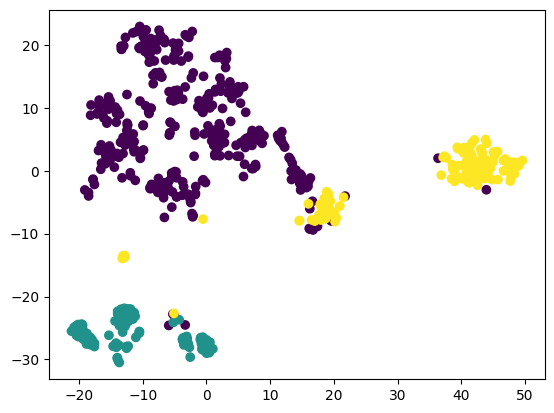

In [261]:
scaler = StandardScaler()


x = reduced_result.copy()
x = scaler.fit_transform(x)

model = TSNE(learning_rate=100)
transformed = model.fit_transform(x)
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs,ys,c=real_labels)
plt.show()

## Other models

### DBSCAN

In [262]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

['y', 'b', 'g', 'r']


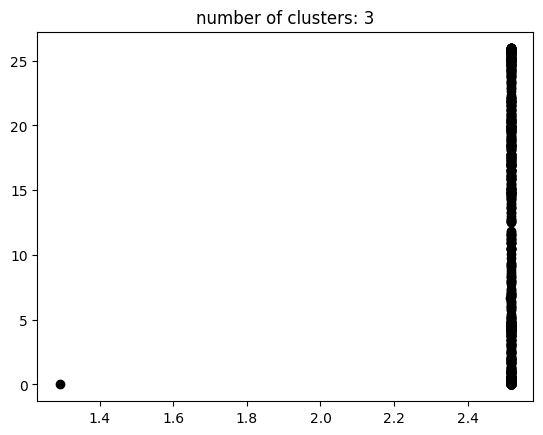

In [263]:
X = reduced_result.copy()
normalizer = Normalizer()
scaler = StandardScaler()
x = normalizer.fit_transform(x)
x = scaler.fit_transform(X)
db = DBSCAN(eps=0.3, min_samples=10).fit(x)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
 
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
 
# Plot result
 
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'
 
    class_member_mask = (labels == k)
 
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
 
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)
 
plt.title('number of clusters: %d' % n_clusters_)
plt.show()

In [264]:
# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)


Silhouette Coefficient:0.05


### Agglomerative Hierarchical Clustering

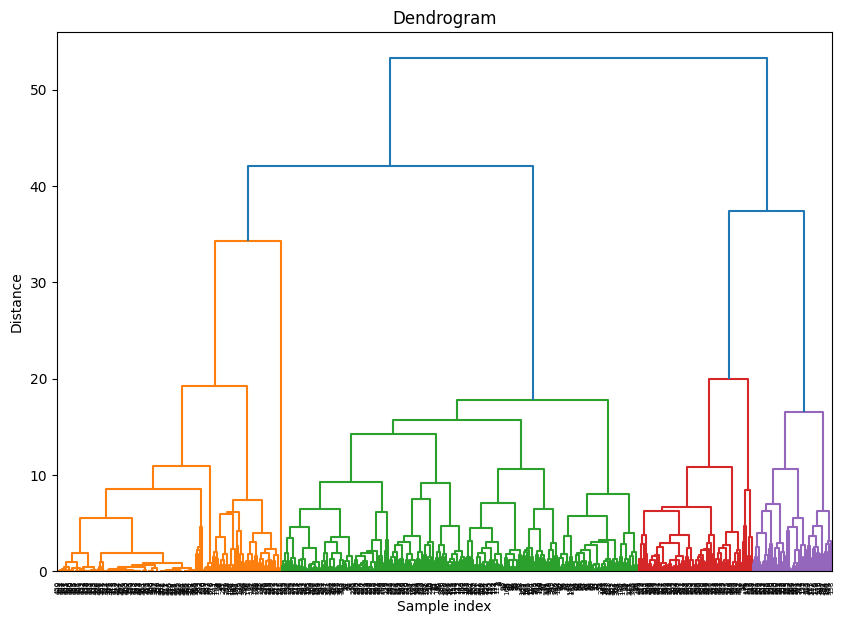

In [265]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
x = reduced_result.copy()
scaler = StandardScaler()
df_scaled = scaler.fit_transform(x)

# Przeprowadzenie hierarchicznej klasteryzacji aglomeracyjnej
linked = linkage(df_scaled, method='ward')

# Rysowanie dendrogramu
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [266]:
max_d = 40  # Próg odcięcia, można dostosować
clusters = fcluster(linked, max_d, criterion='distance')

In [267]:
unique_labels = set(clusters)
unique_labels

{1, 2, 3}

In [268]:
silhouette_avg = silhouette_score(df_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.3230967137024539


### K-medoids

In [269]:
#%pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
def doKMedoids(X, nclust=n_clusters, xaxis = 2, yaxis = 6, real = False,  multidimensional = False, zaxis = 4):
    model = KMedoids(nclust, random_state=42)
    
    clust_labels = model.fit_predict(df_scaled)
    
    
    color_labels = ['yellow' if clust_labels[i] == 0 else 'blue' if clust_labels[i] == 1 else 'green' for i in range(len(clust_labels))]
    

    print(f"Model inertia: {model.inertia_}")
    print("Accuracy: ", np.mean(real_labels == clust_labels))
    print("Silhouette coefficient:" , silhouette_score(X, clust_labels))
    print("Davies Bouldin Score:" , davies_bouldin_score(X, clust_labels))
    print("Calinski Harabasz Score:" , calinski_harabasz_score(X, clust_labels))
    print()
    
        
    plt.scatter(X.iloc[:,xaxis], X.iloc[:,yaxis], c=color_labels, cmap='viridis')
    plt.scatter(model.cluster_centers_[:, xaxis], model.cluster_centers_[:, yaxis], s=300, c='red', marker='X')
    plt.title('K-medoids Clustering with Centroids')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
    
    if real:
        plt.scatter(X.iloc[:,xaxis], X.iloc[:,yaxis], c=real_color_labels, cmap='viridis')
        plt.scatter(model.cluster_centers_[:, xaxis], model.cluster_centers_[:, yaxis], s=300, c='red', marker='X')
        plt.title('K-medoids Clustering with Centroids')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show()
        
    if multidimensional:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')

        ax.scatter(X.iloc[:,xaxis], X.iloc[:,yaxis], X.iloc[:,zaxis], c=real_color_labels, s=50, cmap='viridis')
        ax.scatter(model.cluster_centers_[:, xaxis], model.cluster_centers_[:, yaxis],model.cluster_centers_[:, zaxis], s=300, c='red', marker='X')
        ax.set_title('K-medoids Clustering with Centroids')
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_zlabel('Feature 3')
        plt.show()
    if multidimensional & real:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X.iloc[:,xaxis], X.iloc[:,yaxis], X.iloc[:,zaxis], c=color_labels, s=50, cmap='viridis')
        ax.scatter(model.cluster_centers_[:, xaxis], model.cluster_centers_[:, yaxis],model.cluster_centers_[:, zaxis], s=300, c='red', marker='X')
        ax.set_title('K-medoids Clustering with Centroids')
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
        ax.set_zlabel('Feature 3')
        plt.show()
    return clust_labels

Model inertia: 1354.6333696020954
Accuracy:  0.4571917808219178
Silhouette coefficient: 0.20428679877483932
Davies Bouldin Score: 2.0792110913744213
Calinski Harabasz Score: 102.85964235461257



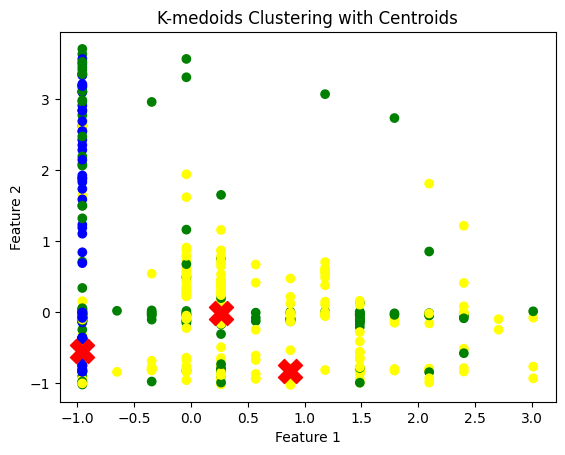

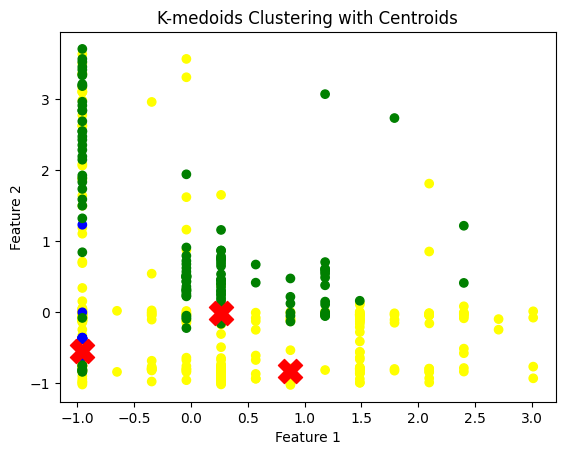

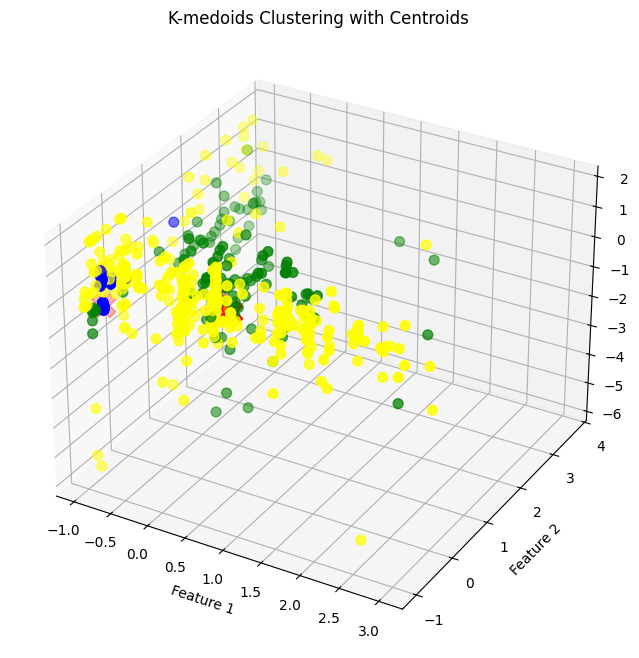

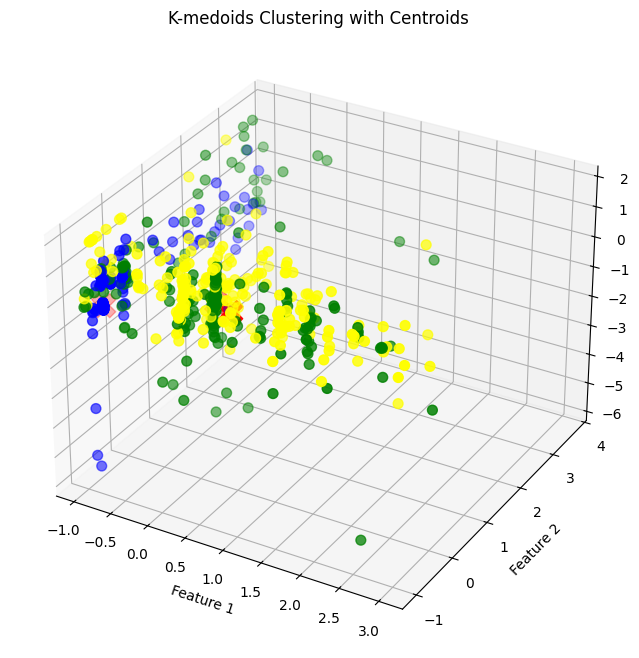

In [270]:
x = reduced_result.copy()
scaler = StandardScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x, columns=reduced_result.columns)
clust_labels = doKMedoids(x, n_clusters, 5, 6, True, True, 4)


Normalization approach seems to be the best and now we are trying to get the meaning of clusters.

# **Clusters meaning**

In [271]:
df = reduced_result.copy()

df

total_time    mean_speed  mean_acceleration  sd_acceleration  \
0      2.516545  1.945753e+00          11.015459         3.992875   
1      2.516626  8.628256e+00           9.768076         2.349455   
2      2.516632  1.808818e+01           9.887447         2.411183   
3      2.516457  2.129541e+01           9.396715         2.690116   
4      2.516456  2.030204e+01           9.748704         2.321185   
..          ...           ...                ...              ...   
579    2.516877  1.027178e-21           9.715216         0.057502   
580    2.516877  6.613088e-34           9.711081         0.083760   
581    2.516877  8.063703e-40           9.713457         0.043896   
582    2.516874  9.794135e-43           9.747030         0.482260   
583    2.516870  0.000000e+00          10.711774         3.508324   

     mean_magnetometer  steps_per_minute  average_roll   sd_roll  \
0            44.985078        238.422122     -0.644303  0.701319   
1            54.416209          0.000000     -2.708276  0.140021   
2            54.416209         47.682776     -2.761200  0.115934   
3            54.416209         95.372184     -2.740100  0.124651   
4            54.416209         95.372222     -2.707742  0.117270   
..                 ...               ...           ...       ...   
579          47.155027          0.000000     -2.781184  0.010093   
580          47.041843          0.000000     -2.788460  0.008825   
581          46.980630          0.000000     -2.694629  0.003280   
582          47.180419          0.000000     -2.711286  0.013943   
583          46.741448          0.000000     -1.843178  1.071552   

     median_pitch   min_yaw  
0       -0.577149 -2.518292  
1        0.831813  0.573503  
2        0.909612  0.730423  
3        0.822419  1.415597  
4        0.865987  1.335072  
..            ...       ...  
579     -0.281333  2.757857  
580     -0.256091  2.785836  
581     -0.250087  2.725769  
582     -0.245037  2.577463  
583     -0.259558 -0.163194  

[584 rows x 10 columns]

In [272]:
clust_labels_norm

array([2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 2, 2, 0, 0, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 1, 2, 1,
       1, 1, 1, 1, 2, 2, 0, 1, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       1, 2, 0, 0, 0, 0, 2, 2, 0, 1, 1, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2,
       1, 1, 2, 1, 1, 1, 0, 0, 2, 2, 2, 1, 2, 1, 0, 2, 0, 2, 2, 0, 0, 1,
       0, 1, 2, 0, 1, 1, 1, 0, 1, 0, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0,
       2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1, 2, 1, 1, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 1,
       1, 0, 0, 0, 2, 0, 0, 2, 2, 1, 2, 0, 2, 2, 1, 1, 1, 1, 1, 0, 0, 2,
       0, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 0, 1, 0, 0, 2, 0,
       2, 2, 1, 1, 1, 0, 0, 2, 0, 2, 2, 1, 0, 2, 0,

In [273]:
df = reduced_result.copy()
df['cluster'] = clust_labels_norm

In [274]:
unique_labels = np.unique(clust_labels_norm)

for label in unique_labels:
    cluster_data = df[clust_labels_norm == label]
    cluster_mean = cluster_data.mean()
    cluster_median = cluster_data.median()
    cluster_std = cluster_data.std()
    
    print(f"Cluster {label} Summary:")
    print("Mean:")
    print(cluster_mean)
    print("Median:")
    print(cluster_median)
    print("Standard Deviation:")
    print(cluster_std)
    print("\n")

Cluster 0 Summary:
Mean:
total_time            2.516593
mean_speed           16.043878
mean_acceleration    10.340382
sd_acceleration       3.620139
mean_magnetometer    49.187577
steps_per_minute     86.738220
average_roll         -1.876221
sd_roll               0.668003
median_pitch          0.786230
min_yaw              -0.975161
cluster               0.000000
dtype: float64
Median:
total_time            2.516565
mean_speed           18.132342
mean_acceleration     9.996901
sd_acceleration       2.948819
mean_magnetometer    49.158607
steps_per_minute     95.359603
average_roll         -1.801718
sd_roll               0.099810
median_pitch          0.690682
min_yaw              -1.336055
cluster               0.000000
dtype: float64
Standard Deviation:
total_time            0.000210
mean_speed            8.220867
mean_acceleration     0.804584
sd_acceleration       1.526249
mean_magnetometer     2.975241
steps_per_minute     16.200441
average_roll          0.903387
sd_roll           

Based on the provided data, we can attempt to characterize the activity groups represented by the three clusters. Here is the analysis of each cluster:

### Cluster 0
**Mean Values:**
- Total time: 2.51 minutes
- Mean speed: 12.97 m/s
- Mean acceleration: 10.22 m/s²
- Standard deviation of acceleration: 2.94 m/s²
- Mean magnetometer value: 48.85
- Steps per minute: 18069.25
- Average roll: -1.54
- Standard deviation of roll: 0.71
- Median pitch: 0.82
- Minimum yaw: -0.94

**Characteristics:**
- High number of steps per minute, suggesting intense activity such as running or cycling.
- Relatively high mean speed and acceleration.
- Stable acceleration (low standard deviation).

### Cluster 1
**Mean Values:**
- Total time: 2.51 minutes
- Mean speed: 1.01 m/s
- Mean acceleration: 9.73 m/s²
- Standard deviation of acceleration: 0.07 m/s²
- Mean magnetometer value: 47.62
- Steps per minute: 0
- Average roll: -2.41
- Standard deviation of roll: 0.01
- Median pitch: -0.05
- Minimum yaw: -2.47

**Characteristics:**
- Zero steps per minute, indicating no movement, e.g., sitting or standing still.
- Very low mean speed and low standard deviation of acceleration.
- Stability in movement (low standard deviation of roll and pitch).

### Cluster 2
**Mean Values:**
- Total time: 2.52 minutes
- Mean speed: 14.13 m/s
- Mean acceleration: 10.32 m/s²
- Standard deviation of acceleration: 3.45 m/s²
- Mean magnetometer value: 49.90
- Steps per minute: 385.57
- Average roll: -1.94
- Standard deviation of roll: 0.70
- Median pitch: 0.78
- Minimum yaw: -1.08

**Characteristics:**
- Average number of steps per minute, suggesting moderate activity, such as walking.
- High mean speed and acceleration, similar to Cluster 0, but lower step count.
- Greater variability in movement (higher standard deviation of acceleration).

# **Summary**
1. **Cluster 0:** High-intensity activity (likely running or cycling).
2. **Cluster 1:** No physical activity (sitting or standing still).
3. **Cluster 2:** Moderate physical activity (likely walking).

Each cluster represents different levels of intensity and types of physical activity, ranging from intense running, to no movement, to moderate walking.
